In [622]:
import cdlib
import pandas as pd
import networkx as nx
from cdlib import algorithms
from collections import Counter
import plotly.express as px
from cdlib import evaluation
from cdlib import viz
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Graph object creation

In [623]:
nodeList = pd.read_csv('data/bd-node.csv', index_col = 'id')
edgeList = pd.read_csv('data/bd-edge.csv')

In [624]:
len(nodeList)

11775

In [625]:
nodeList

,titolo,autore,editore,categoria,raccomandazioni-ricevute,anno-pubblicazione
id,,,,,,
0,Cambiare l'acqua ai fiori,Perrin Valérie,E/O,Letterature straniere: testi,64.0,2019
1,"Ragazza, donna, altro",Evaristo Bernardine,Sur,Letterature straniere: testi,61.0,2020
2,L'Ickabog,Rowling J. K.,Salani,Letteratura per ragazzi,44.0,2020
3,Dante,Barbero Alessandro,Laterza,Letteratura italiana: critica,37.0,2020
4,Borgo Sud,Di Pietrantonio Donatella,Einaudi,Letteratura italiana: testi,36.0,2020
...,...,...,...,...,...,...
20494,La notte delle ricostruzioni,Donaera Andrea,Tetra,Letteratura italiana: testi,1.0,2022
20495,L'ultimo raccolto,Zardi Paolo,Tetra,Letteratura italiana: testi,1.0,2022
20496,X. Una caccia,Aiolli Valerio,Tetra,Letteratura italiana: testi,1.0,2022


In [626]:
g = nx.from_pandas_edgelist(edgeList, 'Source', 'Target', ['Weight'])

In [627]:
#create a nested dict in which we can append all the info for each node of the nodelist
InfoNdic = {}

for index, row in nodeList.iterrows():
    InfoNdic[index] = {'BookName': row['titolo'], 'BookAuthor': row['autore'], 'BookPublisher': row['editore'],'BookGenre': row['categoria'], 'RecommendationsReceived' : row['raccomandazioni-ricevute'], 'YearOfPublication': row['anno-pubblicazione'] }


In [628]:
InfoNdic[11818]

{'BookName': 'Hokusai. Pop-up',
 'BookAuthor': 'McCarthy Courtney Watson',
 'BookPublisher': 'White Star',
 'BookGenre': 'Disegno, arti decorative e minori',
 'RecommendationsReceived': 1.0,
 'YearOfPublication': 2016}

In [629]:
len(InfoNdic)

11775

In [630]:
len(nx.nodes(g))


11775

In [631]:
#setting the attributes of each node using the info contained in the nested dict
nx.set_node_attributes(g, InfoNdic)

In [632]:
#get nodes attributes:

name = nx.get_node_attributes(g, "BookName")
author = nx.get_node_attributes(g, "BookAuthor")
publisher = nx.get_node_attributes(g, "BookPublisher")
genre = nx.get_node_attributes(g, "BookGenre")
recommendations = nx.get_node_attributes(g, "RecommendationsReceived")
year = nx.get_node_attributes(g, "YearOfPublication")

In [633]:
genre[11818]

'Disegno, arti decorative e minori'

In [634]:
name[0]

"Cambiare l'acqua ai fiori"

In [635]:
#select the giant component and continue working with that.
compsList = list(nx.connected_components(g))
GC = g.subgraph(compsList[0])
g = GC

In [636]:
len(g)

11573

# Community Discovery algorithms

## Approach 1: Internal Density
Communities as sets of densely connected entities
Each community must have a number of edges significantly higher than what expected in a random graph

### Louvain

It works finding a function of density and maxime it.


In [637]:
louv_coms = algorithms.louvain(g, weight='weight', resolution=1.)

In [638]:
#function to retrieve the info of the communities found out by the algorithm
def InfoCommunity(communitiesList, algorithm):
    print(f"This algorithm has discovered {len(communitiesList)} communities.")
    print()
    C = [g.subgraph(c).copy() for c in communitiesList]
    sumNodes = 0
    sumEdges = 0
    for count, comm in enumerate(C):
        print(f"Community: {count} - Info: {nx.number_of_nodes(comm)} nodes & {nx.number_of_edges(comm)} edges")
        sumNodes += nx.number_of_nodes(comm)
        sumEdges += nx.number_of_edges(comm)
    print()
    print(f"These communities have a total of {sumNodes} nodes and {sumEdges} edges.")
    print()
    print("Communities statistics: ")
    print("Nodes: " , evaluation.size(g, algorithm))
    print("Edges: ", evaluation.edges_inside(g,algorithm))

In [639]:
InfoCommunity(louv_coms.communities, louv_coms)

This algorithm has discovered 27 communities.

Community: 0 - Info: 1793 nodes & 88551 edges
Community: 1 - Info: 1792 nodes & 153183 edges
Community: 2 - Info: 1503 nodes & 86063 edges
Community: 3 - Info: 859 nodes & 36711 edges
Community: 4 - Info: 606 nodes & 48151 edges
Community: 5 - Info: 587 nodes & 31107 edges
Community: 6 - Info: 586 nodes & 22845 edges
Community: 7 - Info: 515 nodes & 64651 edges
Community: 8 - Info: 512 nodes & 26715 edges
Community: 9 - Info: 446 nodes & 26652 edges
Community: 10 - Info: 366 nodes & 25589 edges
Community: 11 - Info: 326 nodes & 41323 edges
Community: 12 - Info: 253 nodes & 8785 edges
Community: 13 - Info: 252 nodes & 11689 edges
Community: 14 - Info: 246 nodes & 9245 edges
Community: 15 - Info: 222 nodes & 6040 edges
Community: 16 - Info: 183 nodes & 6592 edges
Community: 17 - Info: 172 nodes & 11017 edges
Community: 18 - Info: 87 nodes & 3741 edges
Community: 19 - Info: 84 nodes & 3486 edges
Community: 20 - Info: 39 nodes & 605 edges
Comm

In [640]:
louv_coms.communities

[[20,
  31,
  32,
  41,
  56,
  59,
  60,
  70,
  79,
  97,
  145,
  146,
  171,
  172,
  184,
  186,
  218,
  221,
  229,
  230,
  235,
  240,
  258,
  261,
  280,
  282,
  285,
  301,
  306,
  327,
  345,
  360,
  362,
  390,
  396,
  410,
  411,
  435,
  437,
  450,
  475,
  481,
  484,
  491,
  496,
  498,
  506,
  512,
  517,
  518,
  531,
  532,
  533,
  536,
  586,
  602,
  606,
  608,
  617,
  618,
  619,
  627,
  635,
  651,
  665,
  695,
  696,
  697,
  698,
  707,
  710,
  711,
  730,
  731,
  738,
  739,
  741,
  746,
  768,
  779,
  780,
  863,
  867,
  869,
  893,
  907,
  911,
  918,
  966,
  973,
  990,
  998,
  999,
  1010,
  1015,
  1022,
  1028,
  1038,
  1040,
  1042,
  1049,
  1060,
  1064,
  1069,
  1070,
  1072,
  1075,
  1078,
  1090,
  1109,
  1125,
  1129,
  1148,
  1156,
  1181,
  1200,
  1204,
  1231,
  1235,
  1269,
  1296,
  1303,
  1373,
  1384,
  1391,
  1464,
  1475,
  1479,
  1495,
  1577,
  1634,
  1650,
  1654,
  1676,
  1703,
  1723,
  1727,
  1731,

In [641]:
louv_coms.overlap

False

In [642]:
louv_coms.communities[0]

[20,
 31,
 32,
 41,
 56,
 59,
 60,
 70,
 79,
 97,
 145,
 146,
 171,
 172,
 184,
 186,
 218,
 221,
 229,
 230,
 235,
 240,
 258,
 261,
 280,
 282,
 285,
 301,
 306,
 327,
 345,
 360,
 362,
 390,
 396,
 410,
 411,
 435,
 437,
 450,
 475,
 481,
 484,
 491,
 496,
 498,
 506,
 512,
 517,
 518,
 531,
 532,
 533,
 536,
 586,
 602,
 606,
 608,
 617,
 618,
 619,
 627,
 635,
 651,
 665,
 695,
 696,
 697,
 698,
 707,
 710,
 711,
 730,
 731,
 738,
 739,
 741,
 746,
 768,
 779,
 780,
 863,
 867,
 869,
 893,
 907,
 911,
 918,
 966,
 973,
 990,
 998,
 999,
 1010,
 1015,
 1022,
 1028,
 1038,
 1040,
 1042,
 1049,
 1060,
 1064,
 1069,
 1070,
 1072,
 1075,
 1078,
 1090,
 1109,
 1125,
 1129,
 1148,
 1156,
 1181,
 1200,
 1204,
 1231,
 1235,
 1269,
 1296,
 1303,
 1373,
 1384,
 1391,
 1464,
 1475,
 1479,
 1495,
 1577,
 1634,
 1650,
 1654,
 1676,
 1703,
 1723,
 1727,
 1731,
 1737,
 1738,
 1742,
 1746,
 1747,
 1758,
 1772,
 1804,
 1806,
 1815,
 1877,
 1890,
 1906,
 1911,
 1913,
 1952,
 1959,
 1988,
 2020,
 204

In [643]:
#function to retrieve a list of the focal nodes of each community using eigenvector centrality

def FocalNodeComm(communities, n):
    focalNodes = []
    for x in range(n):
        eigen = nx.eigenvector_centrality(g.subgraph(communities[x]))
        ranksEig = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
        focalNodes.append(ranksEig[0])
    return focalNodes




In [645]:
#focal node of each community of the community set
focalNodes_louvain = FocalNodeComm(louv_coms.communities, len(louv_coms.communities))

for node in focalNodes_louvain:
    print(f"node: {node[0]} - name: {name[node[0]]} - genre: {genre[node[0]]}")

node: 32 - name: Le avventure di Pinocchio. Ediz. integrale - genre: Letteratura per ragazzi
node: 106 - name: Antropologia del turchese. Riflessioni su deserto, mare, pietra e cielo - genre: Scienze della terra
node: 247 - name: Un cuore sleale. Un caso per Manrico Spinori - genre: Letteratura italiana: testi
node: 10 - name: Una vita come tante - genre: Letterature straniere: testi
node: 636 - name: Mancopersogno. Ediz. a colori - genre: Letteratura per ragazzi
node: 548 - name: Origini - genre: Letterature straniere: testi
node: 1147 - name: E tutt'intorno il mare - genre: Letterature straniere: testi
node: 3 - name: Dante - genre: Letteratura italiana: critica
node: 542 - name: Voci nel parco - genre: Letteratura per ragazzi
node: 181 - name: Le braci - genre: Letterature straniere: testi
node: 2 - name: L'Ickabog - genre: Letteratura per ragazzi
node: 4481 - name: ZombieCity. Strategie urbane di sopravvivenza agli zombie e alla crisi climatica - genre: Urbanistica e arte del paesa

#### Internal Evaluation : Fitness scores

##### Partitions quality functions
Using some fitness functions that can be defined to assess the quality of a partition

In [646]:
def FitnessFunctions(CommunityType):

    print("INTERNAL EVALUATION")
    print()
    #average internal degree (AID) = the average internal degree of the community set.
    print(f"1 - Average Internal Degree: \n{evaluation.average_internal_degree(g, CommunityType)}")
    print()
    print()
    #internal edge density (IED) = The internal density of the community set.
    print(f"2 - Internal Edge Density: \n{evaluation.internal_edge_density(g,CommunityType)}")
    print()
    print()
    #conductance (C) = Fraction of total edge volume that points outside the community.
    print(f"3 - Conductance : \n{evaluation.conductance(g,CommunityType)}")
    print()
    print()
    # Triangle participation ratio (TPR) = Fraction of community nodes that belong to a triad.
    print(f"4 - Triangle Participation Ratio : \n{evaluation.triangle_participation_ratio(g,CommunityType)}")
    print()
    print()
    # #Girvan-Newmann modularity (GNM)
    print(f"5 - Newmann modularity : \n{evaluation.newman_girvan_modularity(g,CommunityType)}")
    print()
    print()
    #Expansion = Number of edges per community node that point outside the cluster.
    print(f"6 - Expansion : \n{evaluation.expansion(g,CommunityType)}")
    print()
    print()
    #Normalized-cut (NC)= normalized variant of cut-ratio, that is the fraction of existing edges (out of all possible edges) leaving the community.
    print(f"7 - Normalized cut : \n{evaluation.normalized_cut(g,CommunityType)}")
    print()
    print()
    #Average ODF Degree (AODFD): the average fraction of edges of a node of a community that point outside the community itself.
    print(f"8 - Average ODF Degree : \n{evaluation.avg_odf(g,CommunityType)}")
    print()
    print()
    #Flake ODF = Fraction of nodes in S that have fewer edges pointing inside than to the outside of the community.
    print(f"9 - Flake ODF : \n{evaluation.flake_odf(g,CommunityType)}")
    print()
    print()
    # Fraction over median degree = Fraction of community nodes of having internal degree higher than the median degree value.
    print(f"10 - Fraction over median degree : \n{evaluation.fraction_over_median_degree(g,CommunityType)}")
    print()
    print()
    # Node_coverage = Fraction of total edge volume that points outside the community.
    print(f"11 - Node coverage : \n{louv_coms.node_coverage}")




In [647]:
FitnessFunctions(louv_coms)

INTERNAL EVALUATION

1 - Average Internal Degree: 
FitnessResult(min=10.0, max=253.51533742331287, score=92.99477852332299, std=61.801007239838164)


2 - Internal Edge Density: 
FitnessResult(min=0.055119487491036574, max=1.0, score=0.5254557865004453, std=0.3627086577996059)


3 - Conductance : 
FitnessResult(min=0.09090909090909091, max=0.40149496387651634, score=0.2452442348635856, std=0.09405861111142742)


4 - Triangle Participation Ratio : 
FitnessResult(min=0.994535519125683, max=1.0, score=0.9992464850759778, std=0.0015023273221129378)


5 - Newmann modularity : 
FitnessResult(min=None, max=None, score=0.623536313719432, std=None)


6 - Expansion : 
FitnessResult(min=1.0, max=107.84466019417475, score=33.3633493901351, std=24.24475336625037)


7 - Normalized cut : 
FitnessResult(min=0.09091465944947016, max=0.4228427572047107, score=0.25596516699652594, std=0.09979134452126628)


8 - Average ODF Degree : 
FitnessResult(min=1.0, max=107.84466019417475, score=33.3633493901351, st

#### Semantic Analysis of the single communities

In [648]:
AttrDF1 = nodeList
AttrDF1

,titolo,autore,editore,categoria,raccomandazioni-ricevute,anno-pubblicazione
id,,,,,,
0,Cambiare l'acqua ai fiori,Perrin Valérie,E/O,Letterature straniere: testi,64.0,2019
1,"Ragazza, donna, altro",Evaristo Bernardine,Sur,Letterature straniere: testi,61.0,2020
2,L'Ickabog,Rowling J. K.,Salani,Letteratura per ragazzi,44.0,2020
3,Dante,Barbero Alessandro,Laterza,Letteratura italiana: critica,37.0,2020
4,Borgo Sud,Di Pietrantonio Donatella,Einaudi,Letteratura italiana: testi,36.0,2020
...,...,...,...,...,...,...
20494,La notte delle ricostruzioni,Donaera Andrea,Tetra,Letteratura italiana: testi,1.0,2022
20495,L'ultimo raccolto,Zardi Paolo,Tetra,Letteratura italiana: testi,1.0,2022
20496,X. Una caccia,Aiolli Valerio,Tetra,Letteratura italiana: testi,1.0,2022


In [649]:
AttrDF1 = AttrDF1.drop(['titolo'], axis =1)
AttrDF1

,autore,editore,categoria,raccomandazioni-ricevute,anno-pubblicazione
id,,,,,
0,Perrin Valérie,E/O,Letterature straniere: testi,64.0,2019
1,Evaristo Bernardine,Sur,Letterature straniere: testi,61.0,2020
2,Rowling J. K.,Salani,Letteratura per ragazzi,44.0,2020
3,Barbero Alessandro,Laterza,Letteratura italiana: critica,37.0,2020
4,Di Pietrantonio Donatella,Einaudi,Letteratura italiana: testi,36.0,2020
...,...,...,...,...,...
20494,Donaera Andrea,Tetra,Letteratura italiana: testi,1.0,2022
20495,Zardi Paolo,Tetra,Letteratura italiana: testi,1.0,2022
20496,Aiolli Valerio,Tetra,Letteratura italiana: testi,1.0,2022


In [650]:
AttrDF_comm1 = AttrDF1[AttrDF1.index.isin(louv_coms.communities[0])]

In [651]:
AttrDF_comm1.dtypes

autore                       object
editore                      object
categoria                    object
raccomandazioni-ricevute    float64
anno-pubblicazione            int64
dtype: object

In [652]:
AttrDF_comm1['autore'] = AttrDF_comm1['autore'].astype('category')
AttrDF_comm1['editore'] = AttrDF_comm1['categoria'].astype('category')
AttrDF_comm1['categoria'] =AttrDF_comm1['categoria'].astype('category')

In [653]:
cat_columns = AttrDF_comm1.select_dtypes(['category']).columns
AttrDF_comm1[cat_columns] = AttrDF_comm1[cat_columns].apply(lambda x: x.cat.codes)
AttrDF_comm1

,autore,editore,categoria,raccomandazioni-ricevute,anno-pubblicazione
id,,,,,
20,15,19,19,23.0,2019
31,1162,19,19,19.0,2020
32,256,19,19,19.0,2020
41,493,19,19,18.0,2016
56,483,19,19,16.0,2018
...,...,...,...,...,...
20276,191,19,19,1.0,2021
20296,428,18,18,1.0,2021
20312,734,19,19,1.0,2022


##### Community 1

In [654]:
authors_coms1 = []
genres_coms1 = []
years_coms1 = []
publishers_coms1 = []
bookdealers_coms1 = []

cntAuthor= Counter()
cntGenre = Counter()
cntYear = Counter()
cntPub = Counter()
cntBookdealer = Counter()


In [655]:
#function to add each information of the single node of the community to each list
def addToList(AuthorList, GenreList, YearList, PublisherList, BookdealerList, community):
    for node in community:
        AuthorList.append(author[node])
        GenreList.append(genre[node])
        YearList.append(year[node])
        PublisherList.append(publisher[node])
        BookdealerList.append(recommendations[node])

#function to count frequency of the info of the nodes composing the community and find the most common
def mostCommon(counter, list):
    for el in list:
        counter[el] += 1

    return(counter.most_common())


In [656]:
#ANALYSIS FOR COMMUNITY 1

addToList(authors_coms1, genres_coms1, years_coms1,publishers_coms1, bookdealers_coms1, louv_coms.communities[0])

In [657]:
#most common Genres
for el in (mostCommon(cntGenre, genres_coms1)):
    print(el)

('Letteratura per ragazzi', 1499)
('Letterature straniere: testi', 68)
('Letteratura italiana: testi', 54)
('Disegno, arti decorative e minori', 47)
('Educazione', 16)
('Psicologia', 13)
('Arti ricreative. spettacolo. sport', 10)
('Scienze sociali', 10)
('Musica', 10)
('Geografia generale. viaggi', 8)
('Economia domestica e vita familiare', 8)
("Storia d'europa", 5)
('Letteratura', 5)
('Scienze botaniche', 4)
('Pittura', 4)
('Scienze zoologiche', 3)
('Agricoltura e tecnologie connesse', 3)
('Problemi e servizi sociali', 3)
('Letterature straniere: critica', 2)
('Altre religioni. religione comparata', 2)
('Geografia e storia', 2)
('Letteratura italiana: critica', 2)
('Altro', 2)
('Urbanistica e arte del paesaggio', 2)
('Architettura', 2)
('Fotografia', 1)
('Fenomeni e tecniche paranormali', 1)
('Teologia sociale ed ecclesiastica', 1)
('Chimica e scienze connesse', 1)
('Filosofia e discipline connesse', 1)
('Scienze della vita', 1)
('Astronomia e scienze connesse', 1)
('Biblioteconomia. 

In [658]:
#distribution per frequency
GenreFreq = pd.DataFrame(columns=['Genre', 'Frequency'])
for count, el in enumerate(cntGenre.most_common()):
    new_row = {'Genre': el[0], 'Frequency': el[1]}
    GenreFreq = GenreFreq.append(new_row, ignore_index=True)

fig1 = px.bar(GenreFreq, x="Genre", y="Frequency", title = 'Frequency distribution of genre in comm. 1')
fig1.update_layout(bargap=0.3)
fig1.show()

In [659]:
#distribution per frequency of genres in nodelist

GenresNodelist = []
for index, row in nodeList.iterrows():
    GenresNodelist.append(nodeList.loc[index, 'categoria'])

cntGenresNodelist = Counter()

mostCommon(cntGenresNodelist, GenresNodelist)

GenreFreqNodelist = pd.DataFrame(columns=['Genre', 'Frequency'])
for count, el in enumerate(cntGenresNodelist.most_common()):
    new_row = {'Genre': el[0], 'Frequency': el[1]}
    GenreFreqNodelist = GenreFreqNodelist.append(new_row, ignore_index=True)

fig1_1 = px.bar(GenreFreqNodelist, x="Genre", y="Frequency", title = 'Frequency distribution of genre in our network')
fig1_1.update_layout(bargap=0.3)
fig1_1.show()

In [660]:
#merging and joining the dataframe with the genres+frequency of community 1 and those relative to the entire network
GenreFreqComparison = pd.merge(left=GenreFreq, right=GenreFreqNodelist, how='outer', on='Genre')
GenreFreqComparison.rename(columns={'Frequency_x':'community1_frequency','Frequency_y':'network_frequency'}, inplace=True)
GenreFreqComparison

,Genre,community1_frequency,network_frequency
0,Letteratura per ragazzi,1499,3196
1,Letterature straniere: testi,68,2760
2,Letteratura italiana: testi,54,2129
3,"Disegno, arti decorative e minori",47,549
4,Educazione,16,63
...,...,...,...
76,Logica,NaN,1
77,Paleontologia. paleozoologia,NaN,1
78,Linguaggio,NaN,1
79,Specifiche posizioni filosofiche,NaN,1


In [661]:
#replace NaN values with 0
GenreFreqComparison['community1_frequency'] = GenreFreqComparison['community1_frequency'].fillna(0)
GenreFreqComparison

,Genre,community1_frequency,network_frequency
0,Letteratura per ragazzi,1499,3196
1,Letterature straniere: testi,68,2760
2,Letteratura italiana: testi,54,2129
3,"Disegno, arti decorative e minori",47,549
4,Educazione,16,63
...,...,...,...
76,Logica,0,1
77,Paleontologia. paleozoologia,0,1
78,Linguaggio,0,1
79,Specifiche posizioni filosofiche,0,1


In [662]:
#transform float values into int
GenreFreqComparison['community1_frequency'] = GenreFreqComparison['community1_frequency'].apply(np.int64)
GenreFreqComparison['network_frequency'] = GenreFreqComparison['network_frequency'].apply(np.int64)

In [663]:
#correlation between of genres' frequencies of comm.1 and of network
corr = GenreFreqComparison['community1_frequency'].corr(GenreFreqComparison['network_frequency'], method='spearman')
corr

0.6776493991915874

In [664]:
#most common Authors
for el in (mostCommon(cntAuthor, authors_coms1)):
    print(el)

('Sconosciuto', 43)
('Rodari Gianni', 17)
('Donaldson Julia', 16)
('Lindgren Astrid', 12)
('Ramos Mario', 11)
('Masini Beatrice', 9)
('Lionni Leo', 9)
('Carminati Chiara', 9)
('Tessaro Gek', 9)
('Gutman Colas', 8)
('Dubuc Marianne', 8)
('Tullet Hervé', 8)
('Stark Ulf', 8)
('Calì Davide', 7)
('Mattiangeli Susanna', 7)
('Carioli Janna', 7)
('Browne Anthony', 7)
('Dahl Roald', 6)
('Bonniol Magali', 6)
('Rowling J. K.', 6)
('Herrmann Ève', 6)
('Baccalario Pierdomenico', 6)
('Rizzi Valentina', 6)
('Blake Stephanie', 6)
('Teckentrup Britta', 6)
('Borando Silvia', 6)
('Alemagna Beatrice', 5)
('Cantini Barbara', 5)
('Clima Gabriele', 5)
('Haughton Chris', 5)
('Almond David', 5)
('Strada Annalisa', 5)
('Brun-Cosme Nadine', 5)
('Ungerer Tomi', 5)
('Könnecke Ole', 5)
('Risari Guia', 5)
('Telgemeier Raina', 5)
('Wee Gallery', 5)
('Place Marie-Hélène', 5)
('Ramadier Cédric', 5)
('Silei Fabrizio', 5)
('Bordiglioni Stefano', 5)
('Volpe Giorgio', 5)
('Hanlon Abby', 4)
('Garlando Luigi', 4)
('Cuvellier

In [665]:
#most common Publishers
for el in (mostCommon(cntPub, publishers_coms1)):
    print(el)

('Babalibri', 100)
('Terre di Mezzo', 79)
('Orecchio Acerbo', 75)
('Mondadori', 69)
('Lapis', 64)
("L'Ippocampo Ragazzi", 62)
('Il Castoro', 61)
('Salani', 49)
('Einaudi Ragazzi', 41)
('Emme Edizioni', 40)
('Rizzoli', 39)
('Gallucci', 39)
('TopiPittori', 37)
('Camelozampa', 37)
('Editoriale Scienza', 32)
('Sinnos', 30)
('Logos', 28)
('Piemme', 24)
('Tunué', 24)
('Sassi', 24)
("L'Ippocampo", 23)
('Franco Cosimo Panini', 22)
('La Margherita', 22)
('EL', 21)
('Fatatrac', 20)
('Pelledoca Editore', 19)
('La Nuova Frontiera Junior', 18)
('Zoolibri', 18)
('Settenove', 18)
('Giunti Editore', 15)
('Iperborea', 15)
('Feltrinelli', 14)
('Gribaudo', 14)
('Nord-Sud', 14)
('Beisler', 14)
('minibombo', 13)
('LupoGuido', 13)
('Pulce', 13)
('EDT-Giralangolo', 13)
('BUR Biblioteca Univ. Rizzoli', 12)
('Edizioni Clichy', 12)
('IdeeAli', 12)
('Donzelli', 12)
('De Agostini', 11)
('Fabbri', 11)
('Kite', 10)
('Uovonero', 10)
('Bompiani', 10)
('Carthusia', 10)
('Bohem Press Italia', 10)
('Corraini', 10)
('Har

In [666]:
#distribution per frequency
PublisherFreq = pd.DataFrame(columns=['Publisher', 'Frequency'])
for count, el in enumerate(cntPub.most_common()):
    new_row = {'Publisher': el[0], 'Frequency': el[1]}
    PublisherFreq = PublisherFreq.append(new_row, ignore_index=True)

fig11 = px.bar(PublisherFreq, x="Publisher", y="Frequency", title = 'Frequency distribution of publishers in comm. 1')
fig11.update_layout(bargap=0.3)
fig11.show()

In [667]:
#distribution per frequency of publishers in nodelist

PublishersNodelist = []
for index, row in nodeList.iterrows():
    PublishersNodelist.append(nodeList.loc[index, 'editore'])

cntPubNodelist = Counter()

mostCommon(cntPubNodelist, PublishersNodelist)

PubFreqNodelist = pd.DataFrame(columns=['Genre', 'Frequency'])
for count, el in enumerate(cntPubNodelist.most_common()):
    new_row = {'Publisher': el[0], 'Frequency': el[1]}
    PubFreqNodelist = PubFreqNodelist.append(new_row, ignore_index=True)

fig12 = px.bar(PubFreqNodelist, x="Publisher", y="Frequency", title = 'Frequency distribution of publishers in our network')
fig12.update_layout(bargap=0.3)
fig12.show()

In [668]:
#merging and joining the dataframe with the publisher+frequency of community 1 and those relative to the entire network
PublFreqComparison = pd.merge(left=PublisherFreq, right=PubFreqNodelist, how='outer', on='Publisher')
PublFreqComparison.rename(columns={'Frequency_x':'community1_frequency','Frequency_y':'network_frequency'}, inplace=True)

del PublFreqComparison['Genre']
PublFreqComparison

,Publisher,community1_frequency,network_frequency
0,Babalibri,100,149
1,Terre di Mezzo,79,140
2,Orecchio Acerbo,75,119
3,Mondadori,69,506
4,Lapis,64,91
...,...,...,...
1005,Ubiliber,NaN,1
1006,Capovolte,NaN,1
1007,Kriss,NaN,1
1008,Edizioni Malamente,NaN,1


In [669]:
#replace NaN values with 0
PublFreqComparison['community1_frequency'] = PublFreqComparison['community1_frequency'].fillna(0)
PublFreqComparison

,Publisher,community1_frequency,network_frequency
0,Babalibri,100,149
1,Terre di Mezzo,79,140
2,Orecchio Acerbo,75,119
3,Mondadori,69,506
4,Lapis,64,91
...,...,...,...
1005,Ubiliber,0,1
1006,Capovolte,0,1
1007,Kriss,0,1
1008,Edizioni Malamente,0,1


In [670]:
#transform float values into int
PublFreqComparison['community1_frequency'] = PublFreqComparison['community1_frequency'].apply(np.int64)
PublFreqComparison['network_frequency'] = PublFreqComparison['network_frequency'].apply(np.int64)

In [671]:
#correlation between of genres' frequencies of comm.1 and of network
corr = PublFreqComparison['community1_frequency'].corr(PublFreqComparison['network_frequency'], method='spearman')
corr

0.4925525862194395

In [672]:
#most common Year
for el in (mostCommon(cntYear, years_coms1)):
    print(el)

(2020, 468)
(2019, 336)
(2018, 228)
(2021, 169)
(2017, 156)
(2016, 105)
(2015, 76)
(2014, 53)
(2013, 34)
(2022, 33)
(2012, 30)
(2011, 25)
(1999, 18)
(2010, 16)
(2007, 12)
(2009, 8)
(2008, 7)
(2006, 6)
(2004, 4)
(2005, 3)
(2001, 3)
(2003, 2)
(1985, 1)


In [673]:
#most common bookdealers
for el in (mostCommon(cntBookdealer, bookdealers_coms1)):
    print(el)

(1.0, 963)
(2.0, 439)
(3.0, 189)
(4.0, 72)
(5.0, 49)
(6.0, 25)
(7.0, 16)
(8.0, 13)
(9.0, 8)
(10.0, 5)
(16.0, 3)
(11.0, 3)
(19.0, 2)
(13.0, 2)
(23.0, 1)
(18.0, 1)
(15.0, 1)
(14.0, 1)


In [674]:
#distribution per frequency
RecommendationFreq = pd.DataFrame(columns=['Recommendations', 'Frequency'])
for count, el in enumerate(cntBookdealer.most_common()):
    new_row = {'Recommendations': el[0], 'Frequency': el[1]}
    RecommendationFreq = RecommendationFreq.append(new_row, ignore_index=True)

fig3 = px.bar(RecommendationFreq, x="Recommendations", y="Frequency", title = 'Frequency distribution of recommendations in comm. 1', log_x = True, log_y= True)
fig3.update_layout(bargap=0.3)
fig3.update_xaxes(
    range=[0, 2],  # sets the range of xaxis
)
fig3.show()

In [675]:
#distribution per frequency of recommendations in nodelist

RecommendationsNodelist = []
for index, row in nodeList.iterrows():
    RecommendationsNodelist.append(nodeList.loc[index, 'raccomandazioni-ricevute'])

cntRecommendationsNodelist = Counter()

mostCommon(cntRecommendationsNodelist, RecommendationsNodelist)

RecommendationsNodelist_df = pd.DataFrame(columns=['Recommendations', 'Frequency'])
for count, el in enumerate(cntRecommendationsNodelist.most_common()):
    new_row = {'Recommendations': el[0], 'Frequency': el[1]}
    RecommendationsNodelist_df =RecommendationsNodelist_df.append(new_row, ignore_index=True)

fig3_1 = px.bar(RecommendationsNodelist_df, x="Recommendations", y="Frequency", title = 'Frequency distribution of recommendations in our network', log_x = True, log_y= True)
fig3_1.update_layout(bargap=0.3)
fig3_1.update_xaxes(
    range=[0, 2],  # sets the range of xaxis
)
fig3_1.update_traces(textposition='inside')
fig3_1.show()

##### Assortative mixing on communities

In [676]:
C = [g.subgraph(c).copy() for c in louv_coms.communities]
G_comm1 = C[0]


In [677]:
#Newman's assortativity: Degree assortative = if Nodes tends to connect homogeneously w.r.t. their degree (e.g., hubs with hubs)
nx.degree_assortativity_coefficient(G_comm1)

0.08610461815411075

In [678]:
def AssortativeMixing(communitySet, GraphCommunitySet):
    df = pd.DataFrame(columns=["Network"])
    df.loc["Genre"] = nx.attribute_assortativity_coefficient(g, 'BookGenre')
    df.loc["Publisher"] = nx.attribute_assortativity_coefficient(g, 'BookPublisher')
    df.loc["Author"] = nx.attribute_assortativity_coefficient(g, 'BookAuthor')
    df.loc["Year"] = nx.attribute_assortativity_coefficient(g, 'YearOfPublication')
    df.loc["Recommendations"] = nx.attribute_assortativity_coefficient(g, 'RecommendationsReceived')
    for x in range(len(communitySet)):
        n_of_comm = x+1
        assGenre = nx.attribute_assortativity_coefficient(GraphCommunitySet[x], 'BookGenre')
        assPubl = nx.attribute_assortativity_coefficient(GraphCommunitySet[x], 'BookPublisher')
        assAuth = nx.attribute_assortativity_coefficient(GraphCommunitySet[x], 'BookAuthor')
        assYear = nx.attribute_assortativity_coefficient(GraphCommunitySet[x], 'YearOfPublication')
        assRecomm = nx.attribute_assortativity_coefficient(GraphCommunitySet[x], 'RecommendationsReceived')
        df.insert(x+1, f"Comm. {x+1}",[assGenre, assPubl, assAuth, assYear, assRecomm], True)
        #print(f"Assortativity community {n_of_comm}:")
        #print(f"Genre: {assGenre} - Publisher: {assPubl} - Author: {assAuth} - Year: {assYear} - Recommendations: {assRecomm}")
        #print()
        #print()
    return df

In [679]:
AssortativeMixingDF = AssortativeMixing(louv_coms.communities, C)
AssortativeMixingDF

,Network,Comm. 1,Comm. 2,Comm. 3,Comm. 4,Comm. 5,Comm. 6,Comm. 7,Comm. 8,Comm. 9,...,Comm. 18,Comm. 19,Comm. 20,Comm. 21,Comm. 22,Comm. 23,Comm. 24,Comm. 25,Comm. 26,Comm. 27
Genre,0.216410,0.089608,0.017899,0.030115,0.048206,0.043337,0.083592,0.018213,0.003672,0.052429,...,0.001217,-0.011628,-0.012048,-0.024195,-0.027778,-0.030303,-0.037037,-0.0625,-0.0625,-0.1
Publisher,0.046855,0.029726,0.021219,0.037963,0.011579,0.002696,0.009638,0.014185,0.001071,0.015147,...,-0.005151,-0.011628,-0.012048,-0.028666,-0.027778,-0.030303,-0.037037,-0.0625,-0.0625,-0.1
Author,0.004049,0.003434,0.000848,0.004342,0.002143,-0.002147,-0.000684,0.000410,-0.002300,0.000370,...,-0.006338,-0.011628,-0.012048,-0.028527,-0.027778,-0.030303,-0.037037,-0.0625,-0.0625,-0.1
Year,0.090426,0.028502,0.056445,0.043281,0.012806,0.042221,0.109651,0.076827,0.001088,0.014802,...,0.005585,-0.011628,-0.012048,-0.024504,-0.027778,-0.030303,-0.037037,-0.0625,-0.0625,-0.1
Recommendations,0.031507,0.005834,0.006478,0.010835,-0.000927,-0.001032,0.025679,0.010897,-0.003735,0.014030,...,-0.006005,-0.011628,-0.012048,-0.031567,-0.027778,-0.030303,-0.037037,-0.0625,NaN,-0.1


In [680]:
#Multiscale Mixing Patterns

In [681]:
from MultiscaleMixing import loadNetwork , localassort


In [682]:
# remap house names into integers (required by the algorithm)
nodes_label = list(dict(G_comm1.nodes(data=True)).items())
nodes_label

[(16390,
  {'BookName': 'Il ghiottone. Ediz. illustrata',
   'BookAuthor': 'Albo Pablo',
   'BookPublisher': 'Logos',
   'BookGenre': 'Letteratura per ragazzi',
   'RecommendationsReceived': 1.0,
   'YearOfPublication': 2007}),
 (16396,
  {'BookName': 'Ottoline va a scuola. Ediz. illustrata',
   'BookAuthor': 'Riddell Chris',
   'BookPublisher': 'Il Castoro',
   'BookGenre': 'Letteratura per ragazzi',
   'RecommendationsReceived': 1.0,
   'YearOfPublication': 2009}),
 (16398,
  {'BookName': 'La mamma più bella del mondo. Ediz. illustrata',
   'BookAuthor': 'Barcilon Marianne',
   'BookPublisher': 'Il Castoro',
   'BookGenre': 'Letteratura per ragazzi',
   'RecommendationsReceived': 1.0,
   'YearOfPublication': 2011}),
 (16401,
  {'BookName': 'I bambini leggono',
   'BookAuthor': 'Denti Roberto',
   'BookPublisher': 'Il Castoro',
   'BookGenre': 'Educazione',
   'RecommendationsReceived': 1.0,
   'YearOfPublication': 2011}),
 (20,
  {'BookName': 'Le cose che passano. Ediz. a colori',
  

In [683]:
genres = {G_comm1[1]['BookGenre']: None for G_comm1 in nodes_label}
genres = {G_comm1: i for i, G_comm1 in enumerate(name.keys())}

In [684]:
genres

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 51: 49,
 52: 50,
 53: 51,
 54: 52,
 55: 53,
 56: 54,
 57: 55,
 58: 56,
 59: 57,
 60: 58,
 61: 59,
 62: 60,
 63: 61,
 64: 62,
 65: 63,
 66: 64,
 67: 65,
 68: 66,
 69: 67,
 70: 68,
 71: 69,
 72: 70,
 73: 71,
 74: 72,
 75: 73,
 77: 74,
 78: 75,
 79: 76,
 80: 77,
 81: 78,
 82: 79,
 83: 80,
 84: 81,
 85: 82,
 86: 83,
 87: 84,
 88: 85,
 89: 86,
 90: 87,
 91: 88,
 92: 89,
 93: 90,
 94: 91,
 95: 92,
 96: 93,
 97: 94,
 98: 95,
 100: 96,
 102: 97,
 104: 98,
 105: 99,
 106: 100,
 108: 101,
 109: 102,
 110: 103,
 111: 104,
 112: 105,
 113: 106,
 114: 107,
 116: 108,
 117: 109,
 118:

In [588]:
# relabeling nodes starting from 0 (required by the algorithm)
mapping = {n: i for i, n in enumerate(G_comm1.nodes())}
Gcomm1 = nx.relabel_nodes(G_comm1, mapping)

In [686]:
to_save_net = open('data/tmp_net.txt', 'w')
to_save_labs = open('data/tmp_labels.txt', 'w')

for u, v in G_comm1.edges():
    to_save_net.write(str(u) + " " + str(v))
    to_save_net.write("\n")
to_save_net.close()

for n in G_comm1.nodes():
    to_save_labs.write(str(genres[G_comm1.nodes[n]['BookGenre']]))
    to_save_labs.write("\n")
to_save_labs.close()

E, M = loadNetwork.load('data/tmp_net_Louvcomm1.txt', 'data/tmp_labels_Louvcomm1.txt', zero_index=0)

KeyError: 'Letteratura per ragazzi'

In [437]:
assortM, assortT, Z = localassort.localAssortF(E,M,pr=np.arange(0,1,0.1))

NameError: name 'E' is not defined

In [ ]:
plt.hist(assortT, bins=15, alpha=0.8, edgecolor='white')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim((-1,1))
plt.show()

In [ ]:
node_assortativity = {i: v for i, v in enumerate(assortT)}
reverse_map = {v: k for k, v in mapping.items()}
node_assortativity = {reverse_map[i]: v for i, v in node_assortativity.items()}

In [ ]:
node_assortativity = [(k, v) for k, v in sorted(node_assortativity.items(), key=lambda item: item[1])]

In [ ]:
#Most disassortative books
for nd in node_assortativity[0:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{Gcomm1.nodes[nd[0]]['BookGenre']: >20}")

In [ ]:
#Less disassortative books
for nd in list(reversed(node_assortativity[-6:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{Gcomm1.nodes[nd[0]]['BookGenre']: >20}")

##### Community 2

In [175]:
authors_coms2 = []
genres_coms2 = []
years_coms2 = []
publishers_coms2 = []
bookdealers_coms2 = []

cntAuthor2 = Counter()
cntGenre2 = Counter()
cntYear2 = Counter()
cntPub2 = Counter()
cntBookdealer2 = Counter()

addToList(authors_coms2, genres_coms2, years_coms2,publishers_coms2, bookdealers_coms2, louv_coms.communities[1])

In [35]:
#most common Genres
for el in (mostCommon(cntGenre2, genres_coms2)):
    print(el)

('Letterature straniere: testi', 823)
('Letteratura italiana: testi', 387)
('Letteratura per ragazzi', 85)
('Scienze sociali', 73)
('Disegno, arti decorative e minori', 62)
('Arti ricreative. spettacolo. sport', 35)
('Scienza politica', 32)
('Problemi e servizi sociali', 30)
('Geografia generale. viaggi', 25)
('Musica', 19)
('Educazione', 12)
('Letterature straniere: critica', 11)
('Filosofia occidentale moderna', 11)
('Economia domestica e vita familiare', 10)
('Letteratura', 9)
('Letteratura italiana: critica', 9)
('Psicologia', 8)
('Pittura', 8)
('Arti', 8)
("Storia d'europa", 8)
('Altre religioni. religione comparata', 7)
('Economia', 5)
('Scienze botaniche', 4)
('Fotografia', 4)
('Architettura', 3)
('Geografia e storia', 3)
('Scienze della terra', 2)
('Scienze zoologiche', 2)
("Storia dell'america meridionale", 2)
("Storia d'asia", 2)
('Fenomeni e tecniche paranormali', 2)
('Fisica', 2)
('Storia del mondo antico. archeologia', 2)
('Letteratura greca e latina: testi', 2)
('Etica', 

In [168]:
#distribution per frequency
GenreFreq1 = pd.DataFrame(columns=['Genre', 'Frequency'])
for count, el in enumerate(cntGenre2.most_common()):
    new_row = {'Genre': el[0], 'Frequency': el[1]}
    GenreFreq1 = GenreFreq1.append(new_row, ignore_index=True)

fig4 = px.bar(GenreFreq1, x="Genre", y="Frequency", title = 'Frequency distribution of genre in comm. 2')
fig4.update_layout(bargap=0.3)
fig4.show()

In [36]:
#most common Authors
for el in (mostCommon(cntAuthor2, authors_coms2)):
    print(el)

('Sconosciuto', 61)
('Fante John', 12)
('Onetti Juan Carlos', 8)
('Nothomb Amélie', 6)
('Ernaux Annie', 5)
('Baldwin James', 5)
('Fitzgerald Francis Scott', 5)
('Malerba Luigi', 5)
('Fernández Nona', 5)
('Conti Haroldo', 4)
('Ward Jesmyn', 4)
('Atwood Margaret', 4)
('Lemebel Pedro', 4)
('Cortázar Julio', 4)
('Alderman Naomi', 4)
('Vlautin Willy', 4)
('Gospodinov Georgi', 4)
('Wallace David Foster', 4)
('Meschiari Matteo', 4)
('Sontag Susan', 4)
('Calvino Italo', 4)
('Orwell George', 4)
('Vonnegut Kurt', 4)
('Metallo Claudio', 4)
('Zardi Paolo', 4)
('Saer Juan José', 4)
('Richter Tobias', 4)
('Curci Vittorino', 4)
('McDaniel Tiffany', 3)
('Mabanckou Alain', 3)
('Fisher Mark', 3)
('Arlt Roberto', 3)
('Bloch-Dano Évelyne', 3)
('Thoreau Henry David', 3)
('Szabò Magda', 3)
('Quiriny Bernard', 3)
('Wilson Colin', 3)
('Alcott Louisa May', 3)
('Welty Eudora', 3)
('Calvisi Angelo', 3)
('Ragagnin Luca', 3)
('Bianciardi Luciano', 3)
('Caporaso Gianluca', 3)
('Garcia Tristan', 3)
('Vian Boris', 3)

In [37]:
#most common Publishers
for el in (mostCommon(cntPub2, publishers_coms2)):
    print(el)

('Minimum Fax', 73)
('Il Saggiatore', 60)
('Sur', 52)
("L'orma", 47)
('NN Editore', 46)
('66thand2nd', 46)
('Einaudi', 40)
('Nottetempo', 39)
('Quodlibet', 36)
('Voland', 35)
('Marcos y Marcos', 33)
('Fandango Libri', 33)
('Atlantide (Roma)', 30)
('Racconti', 26)
('Edizioni Black Coffee', 24)
('ADD Editore', 24)
('Miraggi Edizioni', 24)
('Perrone', 21)
('Effequ', 21)
('Iperborea', 20)
('Keller', 20)
('Adelphi', 20)
('Exòrma', 19)
('Neo Edizioni', 19)
('Edicola Ediciones', 19)
('Cliquot', 19)
('Mondadori', 18)
('Safarà Editore', 18)
('La Nuova Frontiera', 17)
('Neri Pozza', 16)
('Nutrimenti', 16)
('Fazi', 16)
('Pidgin Edizioni', 15)
('gran via', 15)
('People', 14)
('E/O', 13)
('Feltrinelli', 13)
('Blu Atlantide', 12)
('Jimenez', 12)
('Edizioni Clichy', 12)
('LiberAria Editrice', 11)
('Bompiani', 11)
('Coconino Press', 11)
('Utopia Editore', 10)
('Zona 42', 10)
('Giometti & Antonello', 10)
('CasaSirio', 10)
('Carbonio Editore', 9)
('pièdimosca', 9)
('Lavieri', 9)
('Eris', 9)
('Arcoiris',

In [38]:
#most common Year
for el in (mostCommon(cntYear2, years_coms2)):
    print(el)

(2020, 518)
(2021, 357)
(2019, 268)
(2018, 181)
(2017, 102)
(2016, 84)
(2015, 42)
(2022, 41)
(2014, 35)
(1999, 29)
(2013, 20)
(2010, 9)
(2011, 9)
(2003, 5)
(2012, 5)
(2008, 5)
(2009, 4)
(2006, 3)
(1996, 2)
(2004, 1)
(2000, 1)
(2007, 1)
(2001, 1)
(1989, 1)
(2002, 1)
(1995, 1)
(1998, 1)


In [176]:

#most common bookdealers
for el in (mostCommon(cntBookdealer2, bookdealers_coms2)):
    print(el)

(1.0, 960)
(2.0, 357)
(3.0, 158)
(4.0, 80)
(5.0, 55)
(6.0, 29)
(7.0, 27)
(8.0, 14)
(12.0, 9)
(9.0, 8)
(11.0, 6)
(10.0, 5)
(15.0, 4)
(13.0, 3)
(20.0, 2)
(19.0, 2)
(14.0, 2)
(26.0, 1)
(24.0, 1)
(23.0, 1)
(18.0, 1)
(17.0, 1)
(16.0, 1)


In [180]:
#distribution per frequency
RecommendationsFreq1 = pd.DataFrame(columns=['Recommendations', 'Frequency'])
for count, el in enumerate(cntBookdealer2.most_common()):
    new_row = {'Recommendations': el[0], 'Frequency': el[1]}
    RecommendationsFreq1 = RecommendationsFreq1.append(new_row, ignore_index=True)

fig5 = px.bar(RecommendationsFreq1, x="Recommendations", y="Frequency", title = 'Frequency distribution of recommendations in comm. 2',  log_x = True, log_y= True)
fig5.update_layout(bargap=0.3)
fig5.show()

##### Community 3

In [40]:
authors_coms3 = []
genres_coms3= []
years_coms3= []
publishers_coms3 = []
bookdealers_coms3 = []

cntAuthor3 = Counter()
cntGenre3 = Counter()
cntYear3 = Counter()
cntPub3 = Counter()
cntBookdealer3 = Counter()

addToList(authors_coms3, genres_coms3, years_coms3,publishers_coms3, bookdealers_coms3, louv_coms.communities[2])

In [41]:
#most common Genres
for el in (mostCommon(cntGenre3, genres_coms3)):
    print(el)

('Letteratura italiana: testi', 391)
('Letteratura per ragazzi', 329)
('Letterature straniere: testi', 302)
('Arti ricreative. spettacolo. sport', 56)
('Scienza politica', 36)
('Scienze sociali', 34)
('Geografia generale. viaggi', 33)
('Psicologia', 31)
("Storia d'europa", 28)
('Economia domestica e vita familiare', 26)
('Problemi e servizi sociali', 26)
('Disegno, arti decorative e minori', 21)
('Musica', 16)
('Diritto', 16)
('Filosofia occidentale moderna', 16)
('Storia del mondo antico. archeologia', 10)
('Arti', 9)
('Scienze mediche. medicina', 9)
('Fenomeni e tecniche paranormali', 7)
('Usi e costumi, etichetta, folclore', 7)
('Gestione e servizi ausiliari', 7)
('Letteratura italiana: critica', 6)
('Geografia e storia', 6)
('Fisica', 6)
('Scienze della vita', 6)
('Teologia sociale ed ecclesiastica', 6)
('Economia', 6)
('Biografia e genealogia', 5)
('Letterature straniere: critica', 5)
('Filosofia antica, medievale, orientale', 5)
('Scienze botaniche', 4)
('Fotografia', 4)
('Letter

In [42]:
#most common Authors
for el in (mostCommon(cntAuthor3, authors_coms3)):
    print(el)

('Sconosciuto', 47)
('Rowling J. K.', 19)
('Carlotto Massimo', 18)
('Kinney Jeff', 16)
('Tolkien John R. R.', 10)
('Carofiglio Gianrico', 9)
('Lallemand Orianne', 8)
('Ferrante Elena', 6)
('Recalcati Massimo', 6)
('Orwell George', 6)
('Donaldson Julia', 6)
('Stilton Geronimo', 6)
('De Giovanni Maurizio', 5)
('Francesco (Jorge Mario Bergoglio)', 5)
('Cussler Clive', 5)
('Trevisan Irena', 5)
("D'Avenia Alessandro", 4)
('Agnello Hornby Simonetta', 4)
('Camilleri Andrea', 4)
('Guccini Francesco', 4)
('Mastrocola Paola', 4)
('Veltroni Walter', 4)
('Leblanc Maurice', 4)
('Chevalier Tracy', 4)
('Zuffi Stefano', 4)
('Tomè Ester', 4)
('Boschi Martina', 4)
('Allende Isabel', 3)
('Carrisi Donato', 3)
('Steinbeck John', 3)
('Dara Domenico', 3)
('Rossi Benedetta', 3)
('Dicker Joël', 3)
('Me contro Te', 3)
('Palacio R. J.', 3)
('Mazzucco Melania G.', 3)
('Auci Stefania', 3)
('Alemagna Beatrice', 3)
('Gazzola Alessia', 3)
('Maraini Dacia', 3)
('King Stephen', 3)
('Robecchi Alessandro', 3)
('Calvino I

In [43]:
#most common Publishers
for el in (mostCommon(cntPub3, publishers_coms3)):
    print(el)

('Einaudi', 136)
('Mondadori', 116)
('Feltrinelli', 63)
('Rizzoli', 61)
('La nave di Teseo', 45)
('Giunti Editore', 45)
('Salani', 38)
('Bompiani', 35)
('Newton Compton Editori', 35)
('Garzanti', 34)
('Piemme', 34)
('Sassi', 33)
('Longanesi', 29)
('Sperling & Kupfer', 27)
('Il Castoro', 25)
('E/O', 25)
('Adelphi', 24)
('Sellerio Editore Palermo', 22)
('Neri Pozza', 22)
('Gribaudo', 21)
('Laterza', 20)
('Solferino', 15)
('Marsilio', 15)
('Mondadori Electa', 13)
('Fazi', 13)
('Guanda', 12)
('De Agostini', 12)
('BUR Biblioteca Univ. Rizzoli', 12)
('Araba Fenice', 12)
('Emme Edizioni', 11)
('Nord', 10)
('HarperCollins Italia', 10)
('Il Mulino', 10)
('Baldini + Castoldi', 10)
('TopiPittori', 9)
('Einaudi Ragazzi', 9)
('Magazzini Salani', 8)
('Ponte alle Grazie', 8)
('Terre di Mezzo', 8)
('Vallardi A.', 7)
('Usborne Publishing', 7)
('Il Leggio', 7)
('Babalibri', 6)
('TEA', 6)
('Gemma Edizioni', 6)
('Il Saggiatore', 6)
('UTET', 6)
('San Paolo Edizioni', 6)
('Bora.La', 6)
('EDT-Giralangolo', 5

In [44]:
#most common Year
for el in (mostCommon(cntYear3, years_coms3)):
    print(el)

(2020, 571)
(2021, 359)
(2019, 133)
(2022, 104)
(2018, 68)
(2017, 54)
(2016, 50)
(2014, 37)
(2015, 35)
(1999, 27)
(2013, 24)
(2012, 14)
(2011, 8)
(2009, 6)
(2007, 5)
(2010, 5)
(2008, 4)
(2005, 3)
(2006, 3)
(2002, 2)
(2004, 2)
(1977, 1)
(1985, 1)
(1995, 1)
(1997, 1)
(2000, 1)


In [45]:

#most common bookdealers
for el in (mostCommon(cntBookdealer3, bookdealers_coms3)):
    print(el)

(1.0, 762)
(2.0, 395)
(3.0, 146)
(4.0, 60)
(5.0, 37)
(6.0, 31)
(7.0, 17)
(8.0, 13)
(11.0, 8)
(10.0, 8)
(9.0, 8)
(14.0, 7)
(13.0, 5)
(12.0, 5)
(18.0, 3)
(15.0, 3)
(16.0, 2)
(37.0, 1)
(36.0, 1)
(32.0, 1)
(25.0, 1)
(24.0, 1)
(23.0, 1)
(21.0, 1)
(19.0, 1)
(17.0, 1)



## Approach 2: Percolation
Communities as a set of nodes grouped together by the propagation of a same property/action/information

### Label Propagation

In [47]:
lp_coms = algorithms.label_propagation(g)

In [48]:
lp_coms.method_name

'Label Propagation'

In [49]:
InfoCommunity(lp_coms.communities, lp_coms)

This algorithm has discovered 108 communities.

Community: 0 - Info: 9353 nodes & 910191 edges
Community: 1 - Info: 150 nodes & 6757 edges
Community: 2 - Info: 121 nodes & 3949 edges
Community: 3 - Info: 99 nodes & 4851 edges
Community: 4 - Info: 89 nodes & 3916 edges
Community: 5 - Info: 80 nodes & 3160 edges
Community: 6 - Info: 79 nodes & 3081 edges
Community: 7 - Info: 73 nodes & 1336 edges
Community: 8 - Info: 72 nodes & 1404 edges
Community: 9 - Info: 71 nodes & 2485 edges
Community: 10 - Info: 62 nodes & 967 edges
Community: 11 - Info: 58 nodes & 1653 edges
Community: 12 - Info: 51 nodes & 1275 edges
Community: 13 - Info: 47 nodes & 993 edges
Community: 14 - Info: 44 nodes & 864 edges
Community: 15 - Info: 43 nodes & 903 edges
Community: 16 - Info: 36 nodes & 506 edges
Community: 17 - Info: 36 nodes & 630 edges
Community: 18 - Info: 35 nodes & 307 edges
Community: 19 - Info: 33 nodes & 528 edges
Community: 20 - Info: 29 nodes & 238 edges
Community: 21 - Info: 29 nodes & 406 edge

In [50]:
lp_coms.communities


[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [51]:
lp_coms.communities[0]


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [52]:
lp_coms.size()

FitnessResult(min=2, max=9353, score=107.1574074074074, std=894.1987222382605)

In [53]:
lp_coms.overlap

False

In [316]:
#focal node of each community of the community set
focalNodes_lp = FocalNodeComm(lp_coms.communities, 108)

for node in focalNodes_lp:
    print(f"node: {node[0]} - name: {name[node[0]]} - genre: {genre[node[0]]}")

node: 3 - name: Dante - genre: Letteratura italiana: critica
node: 2733 - name: Absolutely nothing. Storie e sparizioni nei deserti americani - genre: Geografia generale. viaggi
node: 2653 - name: Ghost - genre: Letteratura per ragazzi
node: 4611 - name: L'erbario di Libereso. Meraviglie della natura attraverso la matita del giardiniere di Calvino. Ediz. illustrata - genre: Scienze botaniche
node: 16897 - name: Esercizi d'addio. Poesie inedite 1952-1965 - genre: Letteratura italiana: testi
node: 10247 - name: La mia scoperta dell'America - genre: Letterature straniere: testi
node: 2577 - name: Educazione per un mondo nuovo - genre: Educazione
node: 1371 - name: Delitti a Fleat House - genre: Letterature straniere: testi
node: 4224 - name: Piccolo blu e piccolo giallo. Ediz. illustrata. Con CD Audio - genre: Letteratura per ragazzi
node: 8066 - name: Alla conquista del Monte Everest. La vera storia dell'impresa di George Mallory e Guy Bullock - genre: Arti ricreative. spettacolo. sport


In [54]:
FitnessFunctions(lp_coms)

INTERNAL EVALUATION

1 - Average Internal Degree: 
FitnessResult(min=1.0, max=194.6308136426815, score=18.8442581410357, std=26.39105196437351)


2 - Internal Edge Density: 
FitnessResult(min=0.020811678105504865, max=1.0, score=0.9481069277673193, std=0.15455223715201294)


3 - Conductance : 
FitnessResult(min=0.016835587835947532, max=0.5714285714285714, score=0.344580279492796, std=0.1319559418923727)


4 - Triangle Participation Ratio : 
FitnessResult(min=0.0, max=1.0, score=0.9629599930305587, std=0.18885199462371216)


5 - Newmann modularity : 
FitnessResult(min=None, max=None, score=0.08889187188396865, std=None)


6 - Expansion : 
FitnessResult(min=1.0, max=47.44444444444444, score=7.9959156306567865, std=8.269557333306938)


7 - Normalized cut : 
FitnessResult(min=0.05211556500816209, max=0.571436670701358, score=0.34628393276137215, std=0.12901344898105024)


8 - Average ODF Degree : 
FitnessResult(min=1.0, max=47.44444444444444, score=7.9959156306567865, std=8.26955733330693

#### Semantic Analysis of the single communities

##### Community 1

In [55]:
authors_lp_coms1 = []
genres_lp_coms1= []
years_lp_coms1= []
publishers_lp_coms1 = []
bookdealers_lp_coms1 = []

cntAuthor_lp1 = Counter()
cntGenre_lp1 = Counter()
cntYear_lp1 = Counter()
cntPub_lp1 = Counter()
cntBookdealer_lp1 = Counter()

addToList(authors_lp_coms1, genres_lp_coms1, years_lp_coms1,publishers_lp_coms1 , bookdealers_lp_coms1, lp_coms.communities[0])

In [56]:
#most common Genres
for el in (mostCommon(cntGenre_lp1, genres_lp_coms1)):
    print(el)

('Letteratura per ragazzi', 2746)
('Letterature straniere: testi', 2374)
('Letteratura italiana: testi', 1732)
('Disegno, arti decorative e minori', 489)
('Scienze sociali', 295)
('Geografia generale. viaggi', 146)
('Problemi e servizi sociali', 144)
('Scienza politica', 140)
('Arti ricreative. spettacolo. sport', 138)
("Storia d'europa", 104)
('Musica', 99)
('Psicologia', 82)
('Economia domestica e vita familiare', 71)
('Filosofia occidentale moderna', 68)
('Fotografia', 58)
('Arti', 46)
('Letterature straniere: critica', 37)
('Letteratura italiana: critica', 36)
('Letteratura', 35)
('Educazione', 34)
('Pittura', 32)
('Economia', 32)
('Storia del mondo antico. archeologia', 24)
('Scienze mediche. medicina', 24)
('Scienze botaniche', 23)
('Usi e costumi, etichetta, folclore', 23)
('Geografia e storia', 21)
('Scienze della vita', 20)
('Fisica', 19)
('Scienze zoologiche', 17)
('Diritto', 17)
('Fenomeni e tecniche paranormali', 14)
('Altre religioni. religione comparata', 12)
('Architettu

In [182]:
#distribution per frequency
GenreFreq2_1 = pd.DataFrame(columns=['Genre', 'Frequency'])
for count, el in enumerate(cntGenre_lp1.most_common()):
    new_row = {'Genre': el[0], 'Frequency': el[1]}
    GenreFreq2_1 = GenreFreq2_1.append(new_row, ignore_index=True)

fig6 = px.bar(GenreFreq2_1, x="Genre", y="Frequency", title = 'Frequency distribution of genre in comm. 1')
fig6.update_layout(bargap=0.3)
fig6.show()

In [183]:
fig1_1.show()

In [289]:
GenreFreqComparison2 = pd.merge(left=GenreFreq2_1, right=GenreFreqNodelist, how='outer', on='Genre')
GenreFreqComparison2.rename(columns={'Frequency_x':'community1_frequency','Frequency_y':'network_frequency'}, inplace=True)
GenreFreqComparison2

,Genre,community1_frequency,network_frequency
0,Letteratura per ragazzi,2746,3196
1,Letterature straniere: testi,2374,2760
2,Letteratura italiana: testi,1732,2129
3,"Disegno, arti decorative e minori",489,549
4,Scienze sociali,295,380
...,...,...,...
76,Organizzazioni generali. museologia,NaN,1
77,Paleontologia. paleozoologia,NaN,1
78,Linguaggio,NaN,1
79,Specifiche posizioni filosofiche,NaN,1


In [290]:
GenreFreqComparison2['community1_frequency'] = GenreFreqComparison2['community1_frequency'].fillna(0)
GenreFreqComparison2

,Genre,community1_frequency,network_frequency
0,Letteratura per ragazzi,2746,3196
1,Letterature straniere: testi,2374,2760
2,Letteratura italiana: testi,1732,2129
3,"Disegno, arti decorative e minori",489,549
4,Scienze sociali,295,380
...,...,...,...
76,Organizzazioni generali. museologia,0,1
77,Paleontologia. paleozoologia,0,1
78,Linguaggio,0,1
79,Specifiche posizioni filosofiche,0,1


In [291]:

GenreFreqComparison2['community1_frequency'] = GenreFreqComparison2['community1_frequency'].apply(np.int64)
GenreFreqComparison2['network_frequency'] = GenreFreqComparison2['network_frequency'].apply(np.int64)

In [342]:
corr = GenreFreqComparison2['community1_frequency'].corr(GenreFreqComparison2['network_frequency'], method='spearman')
corr

0.9705174228468842

In [57]:
#most common Authors
for el in (mostCommon(cntAuthor_lp1, authors_lp_coms1)):
    print(el)

('Sconosciuto', 284)
('Rowling J. K.', 36)
('Rodari Gianni', 34)
('Tabucchi Antonio', 27)
('Donaldson Julia', 25)
('Carlotto Massimo', 19)
('Baccalario Pierdomenico', 18)
('Simenon Georges', 18)
('Kinney Jeff', 17)
('Calvino Italo', 16)
('Lionni Leo', 15)
('King Stephen', 15)
('Lindgren Astrid', 15)
('Carofiglio Gianrico', 14)
('Browne Anthony', 14)
('Tullet Hervé', 14)
('Sciascia Leonardo', 14)
('Munari Bruno', 14)
('Alemagna Beatrice', 13)
('Stark Ulf', 13)
('Fante John', 13)
('Murakami Haruki', 12)
('Carroll Lewis', 12)
('Ramos Mario', 12)
('Dahl Roald', 12)
('Orwell George', 12)
('Zerocalcare', 11)
('Steinbeck John', 11)
('Liao Jimmy', 11)
('Calì Davide', 11)
('Carminati Chiara', 11)
('Lallemand Orianne', 11)
('Woolf Virginia', 11)
('Francaviglia Riccardo', 11)
('Carioli Janna', 11)
('Atwood Margaret', 10)
('Gutman Colas', 10)
('Vecchini Silvia', 10)
('Ungerer Tomi', 10)
('Fitzgerald Francis Scott', 10)
('Masini Beatrice', 10)
('Tessaro Gek', 10)
('Morosinotto Davide', 9)
('De Giov

In [58]:
#most common Publishers
for el in (mostCommon(cntPub_lp1, publishers_lp_coms1)):
    print(el)

('Einaudi', 481)
('Mondadori', 419)
('Adelphi', 287)
('Feltrinelli', 277)
('Rizzoli', 195)
('Bompiani', 150)
('Salani', 144)
('Babalibri', 142)
('Terre di Mezzo', 132)
('Il Saggiatore', 125)
('Minimum Fax', 120)
('Orecchio Acerbo', 118)
('Il Castoro', 118)
('Iperborea', 116)
('E/O', 105)
('Sellerio Editore Palermo', 97)
("L'Ippocampo", 96)
('Neri Pozza', 96)
('La nave di Teseo', 95)
('Piemme', 91)
('TopiPittori', 82)
('Giunti Editore', 79)
('Lapis', 79)
('Fazi', 77)
("L'Ippocampo Ragazzi", 76)
('Coconino Press', 76)
('Laterza', 75)
('Sur', 74)
('Camelozampa', 72)
('Einaudi Ragazzi', 71)
('Garzanti', 70)
('Emme Edizioni', 70)
('Marcos y Marcos', 69)
('Gallucci', 68)
('NN Editore', 67)
("L'orma", 64)
('BUR Biblioteca Univ. Rizzoli', 63)
('Nottetempo', 62)
('Guanda', 60)
('Bao Publishing', 58)
('Sassi', 58)
('Marsilio', 56)
('66thand2nd', 56)
('Fandango Libri', 55)
('Gribaudo', 55)
('Tunué', 54)
('Keller', 52)
('Pellegrini', 51)
('Sperling & Kupfer', 50)
('Rubbettino', 47)
('Quodlibet', 4

In [347]:
#distribution per frequency
PublisherFreq1 = pd.DataFrame(columns=['Publisher', 'Frequency'])
for count, el in enumerate(cntPub_lp1.most_common()):
    new_row = {'Publisher': el[0], 'Frequency': el[1]}
    PublisherFreq1 = PublisherFreq1.append(new_row, ignore_index=True)

fig21 = px.bar(PublisherFreq1, x="Publisher", y="Frequency", title = 'Frequency distribution of publishers in comm. 1')
fig21.update_layout(bargap=0.3)
fig21.show()

In [350]:
#merging and joining the dataframe with the publisher+frequency of community 1 and those relative to the entire network
PublFreqComparison1 = pd.merge(left=PublisherFreq1, right=PubFreqNodelist, how='outer', on='Publisher')
PublFreqComparison1.rename(columns={'Frequency_x':'community1_frequency','Frequency_y':'network_frequency'}, inplace=True)

del PublFreqComparison1['Genre']
PublFreqComparison1

,Publisher,community1_frequency,network_frequency
0,Einaudi,481,554
1,Mondadori,419,506
2,Adelphi,287,327
3,Feltrinelli,277,322
4,Rizzoli,195,224
...,...,...,...
1005,ATS Giacomo Catalani Editore,NaN,1
1006,Pathos Edizioni,NaN,1
1007,Nalanda,NaN,1
1008,Ferrari Editore,NaN,1


In [351]:
#replace NaN values with 0
PublFreqComparison1['community1_frequency'] = PublFreqComparison1['community1_frequency'].fillna(0)
PublFreqComparison1

,Publisher,community1_frequency,network_frequency
0,Einaudi,481,554
1,Mondadori,419,506
2,Adelphi,287,327
3,Feltrinelli,277,322
4,Rizzoli,195,224
...,...,...,...
1005,ATS Giacomo Catalani Editore,0,1
1006,Pathos Edizioni,0,1
1007,Nalanda,0,1
1008,Ferrari Editore,0,1


In [352]:
#transform float values into int
PublFreqComparison1['community1_frequency'] = PublFreqComparison1['community1_frequency'].apply(np.int64)
PublFreqComparison1['network_frequency'] = PublFreqComparison1['network_frequency'].apply(np.int64)

In [353]:
#correlation between of publishers' frequencies of comm.1 and of network
corr = PublFreqComparison1['community1_frequency'].corr(PublFreqComparison1['network_frequency'], method='spearman')
corr

0.7803030773039695

In [59]:
#most common Year
for el in (mostCommon(cntYear_lp1, years_lp_coms1)):
    print(el)

(2020, 2520)
(2021, 1918)
(2019, 1220)
(2018, 779)
(2017, 559)
(2016, 473)
(2022, 418)
(2015, 298)
(2014, 280)
(2013, 180)
(1999, 148)
(2012, 118)
(2011, 94)
(2010, 66)
(2009, 40)
(2008, 38)
(2006, 30)
(2007, 27)
(2004, 17)
(2003, 17)
(2002, 17)
(2005, 17)
(2001, 11)
(2000, 10)
(1998, 8)
(1990, 6)
(1992, 6)
(1989, 5)
(1996, 5)
(1991, 4)
(1994, 4)
(1995, 4)
(1997, 4)
(1993, 3)
(1985, 3)
(1988, 1)
(1984, 1)
(1977, 1)
(1987, 1)
(1964, 1)
(1980, 1)


In [60]:

#most common bookdealers
for el in (mostCommon(cntBookdealer_lp1, bookdealers_lp_coms1)):
    print(el)

(1.0, 5163)
(2.0, 2104)
(3.0, 888)
(4.0, 405)
(5.0, 249)
(6.0, 139)
(7.0, 97)
(8.0, 70)
(9.0, 44)
(10.0, 34)
(11.0, 28)
(12.0, 24)
(13.0, 18)
(15.0, 16)
(14.0, 14)
(18.0, 9)
(16.0, 9)
(19.0, 7)
(17.0, 7)
(23.0, 5)
(20.0, 4)
(26.0, 3)
(29.0, 2)
(25.0, 2)
(24.0, 2)
(21.0, 2)
(64.0, 1)
(61.0, 1)
(44.0, 1)
(37.0, 1)
(36.0, 1)
(35.0, 1)
(33.0, 1)
(32.0, 1)


##### Community  2

In [61]:
authors_lp_coms2 = []
genres_lp_coms2= []
years_lp_coms2= []
publishers_lp_coms2 = []
bookdealers_lp_coms2 = []

cntAuthor_lp2 = Counter()
cntGenre_lp2 = Counter()
cntYear_lp2= Counter()
cntPub_lp2= Counter()
cntBookdealer_lp2 = Counter()

addToList(authors_lp_coms2, genres_lp_coms2, years_lp_coms2,publishers_lp_coms2 , bookdealers_lp_coms2, lp_coms.communities[1])


In [62]:
#most common Genres
for el in (mostCommon(cntGenre_lp2, genres_lp_coms2)):
    print(el)

('Fotografia', 63)
('Letterature straniere: testi', 17)
('Arti', 13)
('Geografia generale. viaggi', 10)
('Letteratura italiana: testi', 7)
('Altro', 4)
('Giornalismo, editoria, giornali', 3)
('Musica', 3)
("Storia d'europa", 3)
('Disegno, arti decorative e minori', 3)
('Arti ricreative. spettacolo. sport', 3)
('Architettura', 3)
('Storia del mondo antico. archeologia', 2)
('Scienza politica', 2)
('Lingua italiana, lingue ladine', 1)
('Lingue germaniche. tedesco', 1)
('Letteratura', 1)
('Psicologia', 1)
('Arti grafiche. stampe', 1)
('Pittura', 1)
('Scienze zoologiche', 1)
('Economia', 1)
('Scienze botaniche', 1)
('Letterature straniere: critica', 1)
('Scienze sociali', 1)
('Economia domestica e vita familiare', 1)
('Filosofia occidentale moderna', 1)
('Letteratura italiana: critica', 1)


In [63]:
#most common Authors
for el in (mostCommon(cntAuthor_lp2, authors_lp_coms2)):
    print(el)

('Sconosciuto', 26)
('Silva Giovanna', 3)
('Giunta Claudio', 2)
('Graziani Stefano', 2)
('Debois Buhl Nanna', 2)
('Benigni Corrado', 1)
('Wolff Kurt', 1)
('Tarkovskij Arsenij A.', 1)
('Santese Luca', 1)
('Finley Moses I.', 1)
('Anderson Scoular', 1)
('Mari Michele', 1)
('Riegl Alois', 1)
('Latronico Vincenzo', 1)
('Baldi Dino', 1)
('Luccone Leonardo Giovanni', 1)
('Giudici Annarella', 1)
('Humboldt Alexander von', 1)
('Saltykov Scedrin Michail', 1)
('Klemperer Victor', 1)
('McCarthy Cormac', 1)
('Dovlatov Sergej', 1)
('Zucchinali Andrea', 1)
('Pettinato Giovanni', 1)
('Campagnoli Matteo', 1)
('Testa Enrico', 1)
('Miorandi Paolo', 1)
('Ghirri Luigi', 1)
('Kutscher Volker', 1)
('Mendelsund Peter', 1)
('Sorokin Vladimir', 1)
('Munari Bruno', 1)
('Muzzarelli Federica', 1)
("D'Arzo Silvio", 1)
('Berg Andrew Scott', 1)
('Mekas Jonas', 1)
('Bertola Chiara', 1)
('Casotti Piergiorgio', 1)
('Clavarino Federico', 1)
('Kessels Erik', 1)
('Spiegelmann Matthew', 1)
('Sdralevich Teresa', 1)
('Vasta G

In [64]:
#most common Publishers
for el in (mostCommon(cntPub_lp2, publishers_lp_coms2)):
    print(el)

('Quodlibet', 22)
('Johan & Levi', 20)
('Humboldt Books', 15)
('Silvana', 12)
('Mousse Publishing', 10)
('Adelphi', 9)
('Witty Kiwi Books', 8)
('Einaudi', 7)
('La Grande Illusion', 5)
('Corraini', 4)
('Skinnerboox', 4)
('Cesurapublish', 3)
('Bruno (Venezia)', 3)
('Giometti & Antonello', 2)
('Contrasto', 2)
('Bompiani', 2)
('A+MBookstore', 2)
('Quinlan', 2)
('Krisis Publishing', 2)
('Laterza', 1)
('Giuntina', 1)
('Sellerio Editore Palermo', 1)
('Exòrma', 1)
('Feltrinelli', 1)
('Elliot', 1)
('Nutrimenti', 1)
('Italo Svevo', 1)
('Sur', 1)
('Skira', 1)
('Postcart Edizioni', 1)
('Il Saggiatore', 1)
('Treccani', 1)
('Gli Ori', 1)
('Nottetempo', 1)
('Il Mulino', 1)


In [65]:
#most common Year
for el in (mostCommon(cntYear_lp2, years_lp_coms2)):
    print(el)

(1999, 26)
(2019, 20)
(2020, 18)
(2017, 15)
(2018, 13)
(2016, 12)
(2014, 12)
(2013, 7)
(2015, 6)
(2011, 3)
(2012, 3)
(2000, 2)
(1998, 2)
(2006, 2)
(2009, 2)
(2008, 2)
(2010, 2)
(2004, 1)
(2007, 1)
(2005, 1)


In [66]:

#most common bookdealers
for el in (mostCommon(cntBookdealer_lp2, bookdealers_lp_coms2)):
    print(el)

(1.0, 139)
(2.0, 9)
(4.0, 2)


##### Community  3

In [67]:
authors_lp_coms3 = []
genres_lp_coms3= []
years_lp_coms3= []
publishers_lp_coms3 = []
bookdealers_lp_coms3 = []

cntAuthor_lp3 = Counter()
cntGenre_lp3 = Counter()
cntYear_lp3= Counter()
cntPub_lp3= Counter()
cntBookdealer_lp3 = Counter()

addToList(authors_lp_coms3, genres_lp_coms3, years_lp_coms3,publishers_lp_coms3 , bookdealers_lp_coms3, lp_coms.communities[2])


In [68]:
#most common Genres
for el in (mostCommon(cntGenre_lp3, genres_lp_coms3)):
    print(el)

('Letterature straniere: testi', 40)
('Letteratura italiana: testi', 28)
('Letteratura per ragazzi', 19)
('Problemi e servizi sociali', 12)
("Storia d'europa", 7)
('Geografia generale. viaggi', 5)
('Geografia e storia', 3)
('Teologia sociale ed ecclesiastica', 1)
('Scienza politica', 1)
('Letteratura', 1)
('Disegno, arti decorative e minori', 1)
('Commercio', 1)
("Storia dell'america settentrionale", 1)
('Biografia e genealogia', 1)


In [69]:
#most common Authors
for el in (mostCommon(cntAuthor_lp3, authors_lp_coms3)):
    print(el)

('Murakami Haruki', 3)
('Ólafsdóttir Audur Ava', 3)
('Sconosciuto', 2)
('MacDonald Ann-Marie', 2)
('Doerr Anthony', 2)
('Marone Lorenzo', 2)
('Hansen Thorkild', 2)
('Pulixi Piergiorgio', 2)
('Da Costa Mélissa', 2)
('Spinelli Jerry', 1)
('Fernández-Armesto Felipe', 1)
('Di Piazza Pierluigi', 1)
('Santagata Nicola', 1)
('Covacich Mauro', 1)
("O'Neill Eugene", 1)
('Crescimanno M. Laura', 1)
('Rackete Carola', 1)
('Fleming Melissa', 1)
('Musso Guillaume', 1)
('McLain Paula', 1)
('Sendker Jan-Philipp', 1)
('Eco Umberto', 1)
('Gibran Kahlil', 1)
('Flanagan Richard', 1)
('Marrone Pietro', 1)
('Ghosh Amitav', 1)
('Zander Joakim', 1)
('Kerr Judith', 1)
('Masters Mathilda', 1)
('May Peter', 1)
('Reynolds Jason', 1)
('Bonatti Walter', 1)
('Napolillo Enzo Gianmaria', 1)
('Abulhawa Susan', 1)
('Rattaro Sara', 1)
('Singer Israel Joshua', 1)
('Bianchetti Gloria', 1)
('Wadhams Peter', 1)
('Carson Rachel', 1)
('Carpentier Alejo', 1)
('Lunn Jonathan', 1)
('Gagliano Fabio', 1)
('Solibello Filippo', 1)
('

In [70]:
#most common Publishers
for el in (mostCommon(cntPub_lp3, publishers_lp_coms3)):
    print(el)

('Einaudi', 15)
('Mondadori', 11)
('Rizzoli', 11)
('Ugo Mursia Editore', 7)
('Feltrinelli', 5)
('Editoriale Scienza', 5)
('La nave di Teseo', 3)
('Piemme', 3)
('BEAT', 3)
('BUR Biblioteca Univ. Rizzoli', 3)
('Bompiani', 3)
('Garzanti', 2)
('Solferino', 2)
('Bollati Boringhieri', 2)
('Magenes', 2)
('Nutrimenti', 2)
('Elliot', 2)
('Iperborea', 2)
('Mondadori Bruno', 1)
('nuovadimensione', 1)
('Nomos Edizioni', 1)
('Di Girolamo', 1)
('Edizioni Il Frangente', 1)
('Rusconi Libri', 1)
('Sperling & Kupfer', 1)
('Ombre Corte', 1)
('Piano B', 1)
('Sellerio Editore Palermo', 1)
('Torri del Vento', 1)
('Tarka', 1)
('Artemide', 1)
('Palomar', 1)
('Pungitopo', 1)
('Salani', 1)
('Castelvecchi', 1)
('Mondadori Electa', 1)
('Adelphi', 1)
('Kite', 1)
('Marsilio', 1)
('Fausto Lupetti Editore', 1)
('Aracne', 1)
('Fanucci', 1)
('LEIMA Edizioni', 1)
('Autori Riuniti', 1)
('Jouvence', 1)
('Istituto Poligrafico Europeo', 1)
('Editori Riuniti Univ. Press', 1)
('Neri Pozza', 1)
('De Agostini', 1)
('Historica E

In [71]:
#most common Year
for el in (mostCommon(cntYear_lp3, years_lp_coms3)):
    print(el)

(2019, 27)
(2018, 15)
(2020, 15)
(2017, 11)
(2016, 11)
(2022, 9)
(2015, 7)
(2014, 6)
(1999, 4)
(2013, 3)
(2005, 3)
(2021, 3)
(1997, 1)
(2009, 1)
(2008, 1)
(2010, 1)
(2012, 1)
(2002, 1)
(2004, 1)


In [72]:

#most common bookdealers
for el in (mostCommon(cntBookdealer_lp3, bookdealers_lp_coms3)):
    print(el)

(1.0, 106)
(2.0, 11)
(3.0, 4)


### Angel
using : cdlib.algorithms.angel [the faster successor of Demon]
It is a node-centric bottom-up community discovery algorithm. It leverages ego-network structures and overlapping label propagation to identify micro-scale communities that are subsequently merged in mesoscale ones.

In [73]:
#minimum community size, default 3
#threshold – merging threshold in [0,1].

DA_coms = algorithms.angel(g, min_community_size=3, threshold=0.25)

In [74]:
InfoCommunity(DA_coms.communities, DA_coms)

This algorithm has discovered 14 communities.

Community: 0 - Info: 11410 nodes & 985760 edges
Community: 1 - Info: 53 nodes & 1378 edges
Community: 2 - Info: 19 nodes & 171 edges
Community: 3 - Info: 12 nodes & 66 edges
Community: 4 - Info: 12 nodes & 66 edges
Community: 5 - Info: 12 nodes & 66 edges
Community: 6 - Info: 11 nodes & 55 edges
Community: 7 - Info: 10 nodes & 45 edges
Community: 8 - Info: 9 nodes & 36 edges
Community: 9 - Info: 8 nodes & 28 edges
Community: 10 - Info: 7 nodes & 21 edges
Community: 11 - Info: 6 nodes & 15 edges
Community: 12 - Info: 6 nodes & 15 edges
Community: 13 - Info: 5 nodes & 10 edges

These communities have a total of 11580 nodes and 987732 edges.

Communities statistics: 
Nodes:  FitnessResult(min=5, max=11410, score=827.1428571428571, std=2935.179475095247)
Edges:  FitnessResult(min=10, max=985760, score=70552.28571428571, std=253833.1815302631)


In [75]:
DA_coms.communities

[[0,
  1,
  10,
  100,
  1000,
  10003,
  10004,
  10005,
  1001,
  10013,
  10017,
  10019,
  1002,
  1003,
  10033,
  10035,
  10036,
  10038,
  10039,
  1004,
  10042,
  1005,
  10054,
  10055,
  1006,
  10066,
  10067,
  10068,
  10069,
  1007,
  10070,
  10071,
  10072,
  10073,
  10074,
  10079,
  1008,
  10082,
  10083,
  10084,
  10085,
  10086,
  1009,
  10091,
  10092,
  10093,
  10096,
  10098,
  101,
  1010,
  1011,
  10118,
  10119,
  1012,
  10120,
  10122,
  10124,
  10125,
  10126,
  10127,
  10128,
  1013,
  10130,
  10131,
  10133,
  10134,
  10137,
  1014,
  10140,
  10143,
  10144,
  10145,
  10147,
  10148,
  1015,
  10151,
  10154,
  1016,
  1017,
  1018,
  1019,
  102,
  1020,
  10204,
  1021,
  10214,
  1022,
  10222,
  10223,
  10224,
  10225,
  10226,
  10227,
  10228,
  10229,
  1023,
  10230,
  10231,
  10232,
  10233,
  10234,
  10235,
  10236,
  10237,
  10238,
  10239,
  1024,
  10241,
  10242,
  10243,
  10246,
  10247,
  1025,
  10251,
  10252,
  10253,

In [76]:
DA_coms.overlap

True

In [317]:
#focal node of each community of the community set
focalNodes_angel = FocalNodeComm(DA_coms.communities, 14)

for node in focalNodes_angel:
    print(f"node: {node[0]} - name: {name[node[0]]} - genre: {genre[node[0]]}")

node: 3 - name: Dante - genre: Letteratura italiana: critica
node: 2054 - name: Abitare poeticamente il mondo-Le platrier siffleur. Ediz. bilingue - genre: Letterature straniere: testi
node: 18491 - name: Primi delitti - genre: Letteratura italiana: testi
node: 18752 - name: Ogni cuore un percorso. Alchimia trasformativa - genre: Altre religioni. religione comparata
node: 17574 - name: Il coraggio di cambiare vita. La coerenza non dà la felicità - genre: Psicologia
node: 1667 - name: La Bibbia censurata e altre storie di divinità immorali - genre: Scienze sociali
node: 453 - name: Ho visto Diego e dico 'o vero - genre: Arti ricreative. spettacolo. sport
node: 2785 - name: Contro la guerra. Il coraggio di costruire la pace - genre: Teologia sociale ed ecclesiastica
node: 13440 - name: Vino e bufale. Tutto quello che vi hanno sempre dato da bere a proposito delle bevande alcoliche - genre: Problemi e servizi sociali
node: 19366 - name: Why London calling? - genre: Musica
node: 165 - name

In [77]:
FitnessFunctions(DA_coms)

INTERNAL EVALUATION

1 - Average Internal Degree: 
FitnessResult(min=4.0, max=172.78878177037686, score=23.556341555026922, std=42.990319442946095)


2 - Internal Edge Density: 
FitnessResult(min=0.015144954138870792, max=1.0, score=0.9296532110099193, std=0.25363895476798143)


3 - Conductance : 
FitnessResult(min=0.00015924261372914759, max=0.9831081081081081, score=0.6421265387816643, std=0.28265015582276154)


4 - Triangle Participation Ratio : 
FitnessResult(min=1.0, max=1.0, score=1.0, std=0.0)


5 - Newmann modularity : 
FitnessResult(min=None, max=None, score=0.003597490713577208, std=None)


6 - Expansion : 
FitnessResult(min=0.02751971954425942, max=232.8, score=46.70503058817137, std=60.02790633160743)


7 - Normalized cut : 
FitnessResult(min=0.07359235767453363, max=0.9836969903751632, score=0.6475761680737993, std=0.271225120392538)


8 - Average ODF Degree : 
FitnessResult(min=0.02751971954425942, max=232.8, score=46.70503058817137, std=60.02790633160743)


9 - Flake ODF

#### Semantic Analysis of the single communities

##### Community 1

In [78]:
authors_DA_coms1 = []
genres_DA_coms1= []
years_DA_coms1= []
publishers_DA_coms1 = []
bookdealers_DA_coms1 = []

cntAuthor_DA1 = Counter()
cntGenre_DA1 = Counter()
cntYear_DA1 = Counter()
cntPub_DA1 = Counter()
cntBookdealer_DA1 = Counter()

addToList(authors_DA_coms1, genres_DA_coms1, years_DA_coms1,publishers_DA_coms1 , bookdealers_DA_coms1, DA_coms.communities[0])

In [79]:
#most common Genres
for el in (mostCommon(cntGenre_DA1, genres_DA_coms1)):
    print(el)

('Letteratura per ragazzi', 3136)
('Letterature straniere: testi', 2733)
('Letteratura italiana: testi', 2050)
('Disegno, arti decorative e minori', 547)
('Scienze sociali', 373)
('Geografia generale. viaggi', 270)
('Arti ricreative. spettacolo. sport', 238)
('Problemi e servizi sociali', 194)
('Scienza politica', 183)
("Storia d'europa", 159)
('Fotografia', 132)
('Musica', 130)
('Psicologia', 112)
('Economia domestica e vita familiare', 87)
('Filosofia occidentale moderna', 85)
('Arti', 72)
('Educazione', 56)
('Letterature straniere: critica', 52)
('Letteratura', 52)
('Economia', 46)
('Letteratura italiana: critica', 45)
('Gestione e servizi ausiliari', 37)
('Pittura', 35)
('Scienze botaniche', 32)
('Geografia e storia', 32)
('Diritto', 32)
('Storia del mondo antico. archeologia', 30)
('Usi e costumi, etichetta, folclore', 28)
('Scienze mediche. medicina', 28)
('Scienze della vita', 28)
('Architettura', 22)
('Fisica', 21)
('Scienze zoologiche', 19)
('Altre religioni. religione compara

In [184]:
#distribution per frequency
GenreFreq3_1 = pd.DataFrame(columns=['Genre', 'Frequency'])
for count, el in enumerate(cntGenre_DA1.most_common()):
    new_row = {'Genre': el[0], 'Frequency': el[1]}
    GenreFreq3_1 = GenreFreq3_1.append(new_row, ignore_index=True)

fig7 = px.bar(GenreFreq3_1, x="Genre", y="Frequency", title = 'Frequency distribution of genre in comm. 1')
fig7.update_layout(bargap=0.3)
fig7.show()

In [185]:
fig1_1.show()

In [293]:
GenreFreqComparison3 = pd.merge(left=GenreFreq3_1, right=GenreFreqNodelist, how='outer', on='Genre')
GenreFreqComparison3.rename(columns={'Frequency_x':'community1_frequency','Frequency_y':'network_frequency'}, inplace=True)
GenreFreqComparison3

,Genre,community1_frequency,network_frequency
0,Letteratura per ragazzi,3136,3196
1,Letterature straniere: testi,2733,2760
2,Letteratura italiana: testi,2050,2129
3,"Disegno, arti decorative e minori",547,549
4,Scienze sociali,373,380
...,...,...,...
76,Specifiche posizioni filosofiche,1,1
77,Lingue germaniche. tedesco,1,1
78,Religione,1,1
79,Lingua inglese e anglosassone,1,1


In [294]:
GenreFreqComparison3['community1_frequency'] = GenreFreqComparison3['community1_frequency'].fillna(0)
GenreFreqComparison3

,Genre,community1_frequency,network_frequency
0,Letteratura per ragazzi,3136,3196
1,Letterature straniere: testi,2733,2760
2,Letteratura italiana: testi,2050,2129
3,"Disegno, arti decorative e minori",547,549
4,Scienze sociali,373,380
...,...,...,...
76,Specifiche posizioni filosofiche,1,1
77,Lingue germaniche. tedesco,1,1
78,Religione,1,1
79,Lingua inglese e anglosassone,1,1


In [295]:

GenreFreqComparison3['community1_frequency'] = GenreFreqComparison3['community1_frequency'].apply(np.int64)
GenreFreqComparison3['network_frequency'] = GenreFreqComparison3['network_frequency'].apply(np.int64)

In [344]:
corr = GenreFreqComparison3['community1_frequency'].corr(GenreFreqComparison3['network_frequency'], method='spearman')
corr

0.9918923952781802

In [80]:
#most common Authors
for el in (mostCommon(cntAuthor_DA1, authors_DA_coms1)):
    print(el)

('Sconosciuto', 401)
('Rodari Gianni', 38)
('Rowling J. K.', 38)
('Tabucchi Antonio', 27)
('Donaldson Julia', 26)
('Baccalario Pierdomenico', 19)
('Carlotto Massimo', 19)
('Simenon Georges', 18)
('Lindgren Astrid', 18)
('Kinney Jeff', 17)
('Munari Bruno', 17)
('Lionni Leo', 16)
('Calvino Italo', 16)
('King Stephen', 15)
('Tolkien John R. R.', 15)
('Tullet Hervé', 15)
('Murakami Haruki', 15)
('Stark Ulf', 14)
('Sciascia Leonardo', 14)
('Alemagna Beatrice', 14)
('Browne Anthony', 14)
('Carofiglio Gianrico', 14)
('Orwell George', 13)
('Steinbeck John', 13)
('Carminati Chiara', 13)
('Fante John', 13)
('Calì Davide', 13)
('Tessaro Gek', 13)
('Dahl Roald', 12)
('Carroll Lewis', 12)
('Lallemand Orianne', 12)
('Atwood Margaret', 12)
('Ramos Mario', 12)
('Blyton Enid', 12)
('Masini Beatrice', 11)
('Liao Jimmy', 11)
('Risari Guia', 11)
('Zerocalcare', 11)
('Woolf Virginia', 11)
('Carioli Janna', 11)
('Francaviglia Riccardo', 11)
('Vecchini Silvia', 10)
('Fitzgerald Francis Scott', 10)
('Mattiang

In [81]:
#most common Publishers
for el in (mostCommon(cntPub_DA1, publishers_DA_coms1)):
    print(el)

('Einaudi', 552)
('Mondadori', 499)
('Adelphi', 325)
('Feltrinelli', 321)
('Rizzoli', 223)
('Bompiani', 187)
('Salani', 163)
('Babalibri', 149)
('Terre di Mezzo', 139)
('Il Saggiatore', 134)
('Minimum Fax', 128)
('Il Castoro', 127)
('Iperborea', 124)
('Orecchio Acerbo', 119)
('E/O', 115)
('Sellerio Editore Palermo', 113)
('La nave di Teseo', 111)
('Neri Pozza', 111)
('Giunti Editore', 106)
('Piemme', 105)
('Laterza', 99)
("L'Ippocampo", 99)
('Einaudi Ragazzi', 92)
('Lapis', 91)
('TopiPittori', 89)
('Fazi', 88)
('Garzanti', 85)
('Sur', 80)
('Camelozampa', 78)
('Gallucci', 77)
("L'Ippocampo Ragazzi", 77)
('Coconino Press', 77)
('Marcos y Marcos', 75)
('Emme Edizioni', 73)
('BUR Biblioteca Univ. Rizzoli', 73)
('NN Editore', 72)
('Guanda', 71)
('Quodlibet', 70)
('Nottetempo', 69)
("L'orma", 65)
('Marsilio', 65)
('Sassi', 63)
('Gribaudo', 61)
('Rubbettino', 60)
('Fandango Libri', 59)
('66thand2nd', 59)
('Bao Publishing', 59)
('Tunué', 56)
('Sperling & Kupfer', 53)
('Keller', 53)
('Corraini'

In [354]:
#distribution per frequency
PublisherFreq2 = pd.DataFrame(columns=['Publisher', 'Frequency'])
for count, el in enumerate(cntPub_DA1.most_common()):
    new_row = {'Publisher': el[0], 'Frequency': el[1]}
    PublisherFreq2 = PublisherFreq2.append(new_row, ignore_index=True)

fig31 = px.bar(PublisherFreq2, x="Publisher", y="Frequency", title = 'Frequency distribution of publishers in comm. 1')
fig31.update_layout(bargap=0.3)
fig31.show()

In [355]:
#merging and joining the dataframe with the publisher+frequency of community 1 and those relative to the entire network
PublFreqComparison2 = pd.merge(left=PublisherFreq2, right=PubFreqNodelist, how='outer', on='Publisher')
PublFreqComparison2.rename(columns={'Frequency_x':'community1_frequency','Frequency_y':'network_frequency'}, inplace=True)

del PublFreqComparison2['Genre']
PublFreqComparison2

,Publisher,community1_frequency,network_frequency
0,Einaudi,552,554
1,Mondadori,499,506
2,Adelphi,325,327
3,Feltrinelli,321,322
4,Rizzoli,223,224
...,...,...,...
1005,Antezza,NaN,1
1006,96 rue de-La-Fontaine Edizioni,NaN,1
1007,Chiado Books Italia,NaN,1
1008,ATS Giacomo Catalani Editore,NaN,1


In [356]:
#replace NaN values with 0
PublFreqComparison2['community1_frequency'] = PublFreqComparison2['community1_frequency'].fillna(0)
PublFreqComparison2

,Publisher,community1_frequency,network_frequency
0,Einaudi,552,554
1,Mondadori,499,506
2,Adelphi,325,327
3,Feltrinelli,321,322
4,Rizzoli,223,224
...,...,...,...
1005,Antezza,0,1
1006,96 rue de-La-Fontaine Edizioni,0,1
1007,Chiado Books Italia,0,1
1008,ATS Giacomo Catalani Editore,0,1


In [357]:
#transform float values into int
PublFreqComparison2['community1_frequency'] = PublFreqComparison2['community1_frequency'].apply(np.int64)
PublFreqComparison2['network_frequency'] = PublFreqComparison2['network_frequency'].apply(np.int64)

In [358]:
#correlation between of genres' frequencies of comm.1 and of network
corr = PublFreqComparison2['community1_frequency'].corr(PublFreqComparison2['network_frequency'], method='spearman')
corr

0.9172791781475047

In [82]:
#most common Year
for el in (mostCommon(cntYear_DA1, years_DA_coms1)):
    print(el)

(2020, 2915)
(2021, 2278)
(2019, 1532)
(2018, 973)
(2017, 694)
(2022, 575)
(2016, 566)
(2015, 365)
(2014, 337)
(1999, 240)
(2013, 229)
(2012, 143)
(2011, 112)
(2010, 85)
(2009, 54)
(2008, 49)
(2006, 45)
(2007, 38)
(2005, 23)
(2004, 22)
(2002, 20)
(2003, 18)
(2001, 15)
(2000, 13)
(1998, 11)
(1992, 7)
(1990, 7)
(1996, 7)
(1995, 5)
(1989, 5)
(1997, 5)
(1994, 4)
(1991, 4)
(1985, 3)
(1987, 3)
(1993, 3)
(1988, 1)
(1984, 1)
(1977, 1)
(1964, 1)
(1980, 1)


In [83]:

#most common bookdealers
for el in (mostCommon(cntBookdealer_DA1, bookdealers_DA_coms1)):
    print(el)

(1.0, 6923)
(2.0, 2362)
(3.0, 924)
(4.0, 408)
(5.0, 249)
(6.0, 139)
(7.0, 97)
(8.0, 70)
(9.0, 44)
(10.0, 34)
(11.0, 28)
(12.0, 24)
(13.0, 18)
(15.0, 16)
(14.0, 14)
(18.0, 9)
(16.0, 9)
(19.0, 7)
(17.0, 7)
(23.0, 5)
(20.0, 4)
(26.0, 3)
(25.0, 2)
(24.0, 2)
(21.0, 2)
(29.0, 2)
(64.0, 1)
(61.0, 1)
(44.0, 1)
(37.0, 1)
(36.0, 1)
(35.0, 1)
(33.0, 1)
(32.0, 1)


## Approach 4: Entity Closeness
Communities as a set of nodes that can reach any member of the group crossing a very low number of edges

### Walk-trap



In [84]:
wt_coms = algorithms.walktrap(g)

In [85]:
wt_coms.method_name

'Walktrap'

In [86]:
InfoCommunity(wt_coms.communities, wt_coms)

This algorithm has discovered 183 communities.

Community: 0 - Info: 1760 nodes & 66659 edges
Community: 1 - Info: 1463 nodes & 139215 edges
Community: 2 - Info: 1331 nodes & 50701 edges
Community: 3 - Info: 1264 nodes & 73074 edges
Community: 4 - Info: 312 nodes & 48516 edges
Community: 5 - Info: 287 nodes & 39378 edges
Community: 6 - Info: 244 nodes & 29404 edges
Community: 7 - Info: 236 nodes & 20301 edges
Community: 8 - Info: 211 nodes & 22155 edges
Community: 9 - Info: 184 nodes & 16836 edges
Community: 10 - Info: 179 nodes & 15931 edges
Community: 11 - Info: 169 nodes & 13546 edges
Community: 12 - Info: 157 nodes & 12246 edges
Community: 13 - Info: 138 nodes & 9453 edges
Community: 14 - Info: 116 nodes & 6670 edges
Community: 15 - Info: 113 nodes & 6116 edges
Community: 16 - Info: 113 nodes & 6328 edges
Community: 17 - Info: 98 nodes & 3265 edges
Community: 18 - Info: 90 nodes & 4005 edges
Community: 19 - Info: 90 nodes & 4005 edges
Community: 20 - Info: 89 nodes & 3506 edges
Com

In [87]:
wt_coms.communities


[[0,
  1,
  3,
  4,
  5,
  6,
  10,
  12,
  14,
  15,
  22,
  23,
  25,
  26,
  28,
  33,
  34,
  35,
  40,
  42,
  44,
  46,
  49,
  59,
  61,
  62,
  81,
  84,
  86,
  88,
  89,
  91,
  92,
  100,
  109,
  110,
  112,
  127,
  130,
  135,
  137,
  138,
  144,
  148,
  150,
  152,
  153,
  161,
  171,
  173,
  176,
  178,
  180,
  181,
  188,
  192,
  208,
  212,
  222,
  234,
  242,
  245,
  248,
  250,
  253,
  260,
  262,
  269,
  270,
  271,
  278,
  290,
  308,
  318,
  319,
  321,
  323,
  324,
  325,
  326,
  329,
  342,
  345,
  350,
  352,
  354,
  367,
  374,
  380,
  383,
  418,
  420,
  443,
  472,
  476,
  482,
  483,
  502,
  504,
  505,
  507,
  512,
  533,
  551,
  556,
  560,
  561,
  572,
  574,
  575,
  577,
  578,
  579,
  580,
  582,
  600,
  611,
  620,
  633,
  641,
  644,
  653,
  654,
  660,
  661,
  666,
  690,
  691,
  695,
  709,
  740,
  753,
  769,
  824,
  825,
  828,
  832,
  882,
  884,
  886,
  925,
  932,
  954,
  964,
  1024,
  1041,
  1044,
  1055,

In [88]:
wt_coms.communities[0]


[0,
 1,
 3,
 4,
 5,
 6,
 10,
 12,
 14,
 15,
 22,
 23,
 25,
 26,
 28,
 33,
 34,
 35,
 40,
 42,
 44,
 46,
 49,
 59,
 61,
 62,
 81,
 84,
 86,
 88,
 89,
 91,
 92,
 100,
 109,
 110,
 112,
 127,
 130,
 135,
 137,
 138,
 144,
 148,
 150,
 152,
 153,
 161,
 171,
 173,
 176,
 178,
 180,
 181,
 188,
 192,
 208,
 212,
 222,
 234,
 242,
 245,
 248,
 250,
 253,
 260,
 262,
 269,
 270,
 271,
 278,
 290,
 308,
 318,
 319,
 321,
 323,
 324,
 325,
 326,
 329,
 342,
 345,
 350,
 352,
 354,
 367,
 374,
 380,
 383,
 418,
 420,
 443,
 472,
 476,
 482,
 483,
 502,
 504,
 505,
 507,
 512,
 533,
 551,
 556,
 560,
 561,
 572,
 574,
 575,
 577,
 578,
 579,
 580,
 582,
 600,
 611,
 620,
 633,
 641,
 644,
 653,
 654,
 660,
 661,
 666,
 690,
 691,
 695,
 709,
 740,
 753,
 769,
 824,
 825,
 828,
 832,
 882,
 884,
 886,
 925,
 932,
 954,
 964,
 1024,
 1041,
 1044,
 1055,
 1062,
 1066,
 1078,
 1087,
 1092,
 1170,
 1222,
 1237,
 1238,
 1248,
 1262,
 1269,
 1273,
 1284,
 1295,
 1307,
 1312,
 1323,
 1334,
 1345,
 1359,


In [89]:
wt_coms.overlap

False

In [318]:
#focal node of each community of the community set
focalNodes_wt = FocalNodeComm(wt_coms.communities, 183)

for node in focalNodes_wt:
    print(f"node: {node[0]} - name: {name[node[0]]} - genre: {genre[node[0]]}")

node: 1 - name: Ragazza, donna, altro - genre: Letterature straniere: testi
node: 106 - name: Antropologia del turchese. Riflessioni su deserto, mare, pietra e cielo - genre: Scienze della terra
node: 9 - name: Harold e la matita viola. Ediz. a colori - genre: Letteratura per ragazzi
node: 247 - name: Un cuore sleale. Un caso per Manrico Spinori - genre: Letteratura italiana: testi
node: 14351 - name: Che bella parola! Parole intraducibili da tutto il mondo - genre: Letteratura per ragazzi
node: 281 - name: Esplorando gli elementi. Una guida completa alla tavola periodica. Ediz. illustrata. Con Poster - genre: Letteratura per ragazzi
node: 4278 - name: La memoria dell'uguale - genre: Letteratura italiana: testi
node: 659 - name: Shantaram - genre: Letterature straniere: testi
node: 14848 - name: Il Vangelo secondo don Stilo. Il prete scomodo che per forza doveva essere mafioso - genre: Storia e geografia della chiesa
node: 4101 - name: Anubi. Nuova ediz. - genre: Disegno, arti decorati

In [90]:
FitnessFunctions(wt_coms)

INTERNAL EVALUATION

1 - Average Internal Degree: 
FitnessResult(min=0.0, max=311.0, score=31.877953554726197, std=51.241773948807456)


2 - Internal Edge Density: 
FitnessResult(min=0, max=1.0, score=0.9425839779351819, std=0.19416589991303676)


3 - Conductance : 
FitnessResult(min=0.057692307692307696, max=1.0, score=0.39883042212319886, std=0.16809403278342602)


4 - Triangle Participation Ratio : 
FitnessResult(min=0.0, max=1.0, score=0.9271152143596441, std=0.25705680989048196)


5 - Newmann modularity : 
FitnessResult(min=None, max=None, score=0.555789332986822, std=None)


6 - Expansion : 
FitnessResult(min=1.0, max=134.69230769230768, score=15.750495441300608, std=22.11672162680806)


7 - Normalized cut : 
FitnessResult(min=0.05776832703568301, max=1.0000005062053179, score=0.40076250368916305, std=0.16820571228236314)


8 - Average ODF Degree : 
FitnessResult(min=1.0, max=134.69230769230768, score=15.750495441300608, std=22.11672162680806)


9 - Flake ODF : 
FitnessResult(min

#### Semantic Analysis of the single communities

##### Community 1

In [91]:
authors_wt_coms1 = []
genres_wt_coms1= []
years_wt_coms1= []
publishers_wt_coms1 = []
bookdealers_wt_coms1 = []

cntAuthor_wt_coms1 = Counter()
cntGenre_wt_coms1 = Counter()
cntYear_wt_coms1 = Counter()
cntPub_wt_coms1 = Counter()
cntBookdealer_wt_coms1 = Counter()

addToList(authors_wt_coms1, genres_wt_coms1, years_wt_coms1,publishers_wt_coms1 , bookdealers_wt_coms1, wt_coms.communities[0])

In [92]:
#most common Genres
for el in (mostCommon(cntGenre_wt_coms1, genres_wt_coms1)):
    print(el)

('Letterature straniere: testi', 718)
('Letteratura italiana: testi', 369)
('Letteratura per ragazzi', 157)
('Scienze sociali', 95)
('Disegno, arti decorative e minori', 92)
('Geografia generale. viaggi', 38)
('Problemi e servizi sociali', 31)
('Scienza politica', 29)
('Musica', 24)
('Filosofia occidentale moderna', 22)
('Arti ricreative. spettacolo. sport', 20)
("Storia d'europa", 20)
('Psicologia', 18)
('Economia domestica e vita familiare', 17)
('Arti', 8)
('Letteratura italiana: critica', 7)
('Scienze botaniche', 7)
('Pittura', 7)
('Geografia e storia', 6)
('Letterature straniere: critica', 6)
('Scienze zoologiche', 5)
('Fotografia', 5)
('Letteratura', 5)
('Fisica', 4)
('Scienze mediche. medicina', 4)
('Architettura', 4)
('Scienze della vita', 4)
('Economia', 4)
('Altre religioni. religione comparata', 3)
('Storia del mondo antico. archeologia', 3)
('Filosofia e discipline connesse', 3)
('Urbanistica e arte del paesaggio', 3)
('Giornalismo, editoria, giornali', 2)
('Biografia e gen

In [186]:

#distribution per frequency
GenreFreq4_1 = pd.DataFrame(columns=['Genre', 'Frequency'])
for count, el in enumerate(cntGenre_wt_coms1.most_common()):
    new_row = {'Genre': el[0], 'Frequency': el[1]}
    GenreFreq4_1 = GenreFreq4_1.append(new_row, ignore_index=True)

fig8 = px.bar(GenreFreq4_1, x="Genre", y="Frequency", title='Frequency distribution of genre in comm. 1')
fig8.update_layout(bargap=0.3)
fig8.show()

In [297]:
GenreFreqComparison4 = pd.merge(left=GenreFreq4_1, right=GenreFreqNodelist, how='outer', on='Genre')
GenreFreqComparison4.rename(columns={'Frequency_x':'community1_frequency','Frequency_y':'network_frequency'}, inplace=True)
GenreFreqComparison4

,Genre,community1_frequency,network_frequency
0,Letterature straniere: testi,718,2760
1,Letteratura italiana: testi,369,2129
2,Letteratura per ragazzi,157,3196
3,Scienze sociali,95,380
4,"Disegno, arti decorative e minori",92,549
...,...,...,...
76,Organizzazioni generali. museologia,NaN,1
77,Paleontologia. paleozoologia,NaN,1
78,Linguaggio,NaN,1
79,Specifiche posizioni filosofiche,NaN,1


In [298]:
GenreFreqComparison4['community1_frequency'] = GenreFreqComparison4['community1_frequency'].fillna(0)
GenreFreqComparison4

,Genre,community1_frequency,network_frequency
0,Letterature straniere: testi,718,2760
1,Letteratura italiana: testi,369,2129
2,Letteratura per ragazzi,157,3196
3,Scienze sociali,95,380
4,"Disegno, arti decorative e minori",92,549
...,...,...,...
76,Organizzazioni generali. museologia,0,1
77,Paleontologia. paleozoologia,0,1
78,Linguaggio,0,1
79,Specifiche posizioni filosofiche,0,1


In [299]:

GenreFreqComparison4['community1_frequency'] = GenreFreqComparison4['community1_frequency'].apply(np.int64)
GenreFreqComparison4['network_frequency'] = GenreFreqComparison4['network_frequency'].apply(np.int64)

In [346]:
corr = GenreFreqComparison4['community1_frequency'].corr(GenreFreqComparison4['network_frequency'], method='spearman')
corr

0.8218924072588637

In [93]:
#most common Authors
for el in (mostCommon(cntAuthor_wt_coms1, authors_wt_coms1)):
    print(el)

('Sconosciuto', 52)
('Steinbeck John', 7)
('King Stephen', 7)
('Stefánsson Jón Kalman', 6)
('Strout Elizabeth', 6)
('Winslow Don', 6)
('Fitzgerald Francis Scott', 6)
('Woolf Virginia', 6)
('Zerocalcare', 5)
('Carofiglio Gianrico', 5)
('Carrère Emmanuel', 5)
('Auster Paul', 5)
('Rodari Gianni', 5)
('Lemaitre Pierre', 5)
('Han Byung-Chul', 5)
('Simi Giampaolo', 5)
('Arena Alessio', 5)
('Tabucchi Antonio', 5)
('Lansdale Joe R.', 5)
('Barbero Alessandro', 4)
('Toews Miriam', 4)
('Abdolah Kader', 4)
('Cognetti Paolo', 4)
('Dabos Christelle', 4)
('Murakami Haruki', 4)
('Naspini Sacha', 4)
('Bartolomei Fabio', 4)
('Roth Philip', 4)
('Marías Javier', 4)
('Cavina Cristiano', 4)
('Weil Simone', 4)
('Gasparrini Lorenzo', 4)
('McDaniel Tiffany', 3)
('Rovelli Carlo', 3)
('Murgia Michela', 3)
('Dara Domenico', 3)
('McGrath Patrick', 3)
('Goldman William', 3)
('Bussi Michel', 3)
('Candiani Chandra Livia', 3)
('De Luca Erri', 3)
('Atwood Margaret', 3)
('Sciascia Leonardo', 3)
('Cassar Scalia Cristina'

In [94]:
#most common Publishers
for el in (mostCommon(cntPub_wt_coms1, publishers_wt_coms1)):
    print(el)

('Einaudi', 174)
('Mondadori', 93)
('Feltrinelli', 83)
('Adelphi', 78)
('Iperborea', 51)
('E/O', 44)
('Bompiani', 41)
('Neri Pozza', 39)
('Sellerio Editore Palermo', 38)
('Minimum Fax', 38)
('Fazi', 35)
("L'Ippocampo", 30)
('Keller', 28)
('Laterza', 27)
('Guanda', 25)
('Marcos y Marcos', 24)
('La nave di Teseo', 24)
('Rizzoli', 24)
('BEAT', 23)
('Salani', 20)
('Bao Publishing', 19)
('BUR Biblioteca Univ. Rizzoli', 18)
('Coconino Press', 18)
('Marsilio', 17)
('Nottetempo', 16)
('Sur', 15)
('Garzanti', 15)
('NN Editore', 14)
('TEA', 14)
('Edizioni Alegre', 14)
("L'orma", 13)
('Ponte alle Grazie', 12)
('Il Saggiatore', 12)
('Produzioni Nero', 11)
('Fandango Libri', 10)
('Piemme', 10)
('Rizzoli Lizard', 10)
('ADD Editore', 9)
('Sperling & Kupfer', 9)
('Bollati Boringhieri', 9)
('TopiPittori', 8)
('Solferino', 8)
('Quodlibet', 8)
('Longanesi', 8)
('People', 8)
('Edizioni Black Coffee', 7)
('Blackie', 7)
('Nutrimenti', 7)
('Einaudi Ragazzi', 7)
('Edizioni Clichy', 7)
('La Nuova Frontiera', 6

In [359]:
#distribution per frequency
PublisherFreq3 = pd.DataFrame(columns=['Publisher', 'Frequency'])
for count, el in enumerate(cntPub_wt_coms1.most_common()):
    new_row = {'Publisher': el[0], 'Frequency': el[1]}
    PublisherFreq3 = PublisherFreq3.append(new_row, ignore_index=True)

fig41 = px.bar(PublisherFreq3, x="Publisher", y="Frequency", title = 'Frequency distribution of publishers in comm. 1')
fig41.update_layout(bargap=0.3)
fig41.show()

In [360]:
#merging and joining the dataframe with the publisher+frequency of community 1 and those relative to the entire network
PublFreqComparison3 = pd.merge(left=PublisherFreq3, right=PubFreqNodelist, how='outer', on='Publisher')
PublFreqComparison3.rename(columns={'Frequency_x':'community1_frequency','Frequency_y':'network_frequency'}, inplace=True)

del PublFreqComparison3['Genre']
PublFreqComparison3

,Publisher,community1_frequency,network_frequency
0,Einaudi,174,554
1,Mondadori,93,506
2,Feltrinelli,83,322
3,Adelphi,78,327
4,Iperborea,51,124
...,...,...,...
1005,Franco Maria Ricci,NaN,1
1006,Ubiliber,NaN,1
1007,Capovolte,NaN,1
1008,Kriss,NaN,1


In [361]:
#replace NaN values with 0
PublFreqComparison3['community1_frequency'] = PublFreqComparison3['community1_frequency'].fillna(0)
PublFreqComparison3

,Publisher,community1_frequency,network_frequency
0,Einaudi,174,554
1,Mondadori,93,506
2,Feltrinelli,83,322
3,Adelphi,78,327
4,Iperborea,51,124
...,...,...,...
1005,Franco Maria Ricci,0,1
1006,Ubiliber,0,1
1007,Capovolte,0,1
1008,Kriss,0,1


In [362]:
#transform float values into int
PublFreqComparison3['community1_frequency'] = PublFreqComparison3['community1_frequency'].apply(np.int64)
PublFreqComparison3['network_frequency'] = PublFreqComparison3['network_frequency'].apply(np.int64)

In [363]:
#correlation between of publishers' frequencies of comm.1 and of network
corr = PublFreqComparison3['community1_frequency'].corr(PublFreqComparison3['network_frequency'], method='spearman')
corr

0.5662968746726141

In [95]:
#most common Year
for el in (mostCommon(cntYear_wt_coms1, years_wt_coms1)):
    print(el)

(2020, 485)
(2021, 382)
(2019, 215)
(2018, 129)
(2017, 93)
(2022, 82)
(2016, 76)
(2014, 62)
(2015, 60)
(2013, 40)
(2011, 24)
(2012, 23)
(1999, 16)
(2010, 14)
(2009, 12)
(2008, 10)
(2002, 7)
(2005, 6)
(1990, 4)
(2003, 3)
(2006, 2)
(1998, 2)
(2004, 2)
(2000, 2)
(1989, 1)
(1993, 1)
(1987, 1)
(1991, 1)
(1994, 1)
(1995, 1)
(1964, 1)
(2007, 1)
(1984, 1)


In [96]:

#most common bookdealers
for el in (mostCommon(cntBookdealer_wt_coms1, bookdealers_wt_coms1)):
    print(el)

(1.0, 949)
(2.0, 372)
(3.0, 171)
(4.0, 75)
(5.0, 64)
(6.0, 26)
(8.0, 20)
(7.0, 18)
(11.0, 10)
(10.0, 9)
(12.0, 6)
(9.0, 5)
(14.0, 4)
(13.0, 4)
(19.0, 3)
(18.0, 3)
(17.0, 3)
(15.0, 3)
(26.0, 2)
(21.0, 2)
(20.0, 2)
(64.0, 1)
(61.0, 1)
(37.0, 1)
(36.0, 1)
(35.0, 1)
(33.0, 1)
(25.0, 1)
(24.0, 1)
(16.0, 1)


##### Community 2

In [97]:
authors_wt_coms2 = []
genres_wt_coms2= []
years_wt_coms2= []
publishers_wt_coms2 = []
bookdealers_wt_coms2 = []

cntAuthor_wt_coms2 = Counter()
cntGenre_wt_coms2 = Counter()
cntYear_wt_coms2 = Counter()
cntPub_wt_coms2 = Counter()
cntBookdealer_wt_coms2 = Counter()

addToList(authors_wt_coms2, genres_wt_coms2, years_wt_coms2, publishers_wt_coms2 , bookdealers_wt_coms2, wt_coms.communities[1])

In [98]:
#most common Genres
for el in (mostCommon(cntGenre_wt_coms2, genres_wt_coms2)):
    print(el)

('Letterature straniere: testi', 686)
('Letteratura italiana: testi', 357)
('Scienze sociali', 68)
('Letteratura per ragazzi', 57)
('Disegno, arti decorative e minori', 57)
('Scienza politica', 32)
('Problemi e servizi sociali', 30)
('Arti ricreative. spettacolo. sport', 24)
('Geografia generale. viaggi', 17)
('Musica', 11)
('Letterature straniere: critica', 10)
('Filosofia occidentale moderna', 9)
('Economia domestica e vita familiare', 9)
('Letteratura italiana: critica', 8)
('Letteratura', 7)
("Storia d'europa", 7)
('Economia', 6)
('Altre religioni. religione comparata', 6)
('Fotografia', 5)
('Educazione', 5)
('Scienze botaniche', 4)
('Pittura', 4)
('Arti', 3)
('Geografia e storia', 3)
('Scienze zoologiche', 3)
('Etica', 3)
('Scienze della terra', 2)
("Storia d'asia", 2)
('Fenomeni e tecniche paranormali', 2)
('Architettura', 2)
('Fisica', 2)
('Storia del mondo antico. archeologia', 2)
('Letteratura greca e latina: testi', 2)
('Metafisica', 2)
('Giornalismo, editoria, giornali', 2)


In [99]:
#most common Authors
for el in (mostCommon(cntAuthor_wt_coms2, authors_wt_coms2)):
    print(el)

('Sconosciuto', 47)
('Fante John', 12)
('Ernaux Annie', 5)
('Baldwin James', 5)
('Nothomb Amélie', 5)
('Zardi Paolo', 5)
('Alderman Naomi', 4)
('McDaniel Tiffany', 4)
('Vlautin Willy', 4)
('Wallace David Foster', 4)
('Meschiari Matteo', 4)
('Calvino Italo', 4)
('Orwell George', 4)
('Curci Vittorino', 4)
('Conti Haroldo', 3)
('Whitehead Colson', 3)
('Ward Jesmyn', 3)
('Atwood Margaret', 3)
('Lemebel Pedro', 3)
('Beauvoir Simone de', 3)
('Gospodinov Georgi', 3)
('Bloch-Dano Évelyne', 3)
('Thoreau Henry David', 3)
('Szabò Magda', 3)
('Wilson Colin', 3)
('bell hooks', 3)
('Bianciardi Luciano', 3)
('Caporaso Gianluca', 3)
('Volodine Antoine', 3)
('Leavitt David', 3)
('Offill Jenny', 3)
('Frezzato Massimiliano', 3)
('Sontag Susan', 3)
('Vonnegut Kurt', 3)
('Rovelli Marco', 3)
('Woolf Virginia', 3)
('Camon Ferdinando', 3)
('Metallo Claudio', 3)
('Fernández Nona', 3)
('Sperduti Carlo', 3)
('Haruf Kent', 2)
('Roscia Massimo', 2)
("O'Connor Flannery", 2)
('Poissant David James', 2)
('Fischer Tib

In [100]:
#most common Publishers
for el in (mostCommon(cntPub_wt_coms2, publishers_wt_coms2)):
    print(el)

('Minimum Fax', 68)
('Il Saggiatore', 57)
('66thand2nd', 45)
("L'orma", 44)
('NN Editore', 43)
('Nottetempo', 42)
('Sur', 33)
('Voland', 33)
('Fandango Libri', 32)
('Einaudi', 30)
('Atlantide (Roma)', 29)
('Marcos y Marcos', 29)
('Quodlibet', 27)
('Miraggi Edizioni', 27)
('ADD Editore', 24)
('Racconti', 23)
('Effequ', 23)
('Exòrma', 21)
('Keller', 21)
('Neo Edizioni', 19)
('Edizioni Black Coffee', 17)
('Cliquot', 17)
('Safarà Editore', 17)
('Perrone', 16)
('Edicola Ediciones', 16)
('Fazi', 15)
('Alter Ego', 14)
('Adelphi', 14)
('Pidgin Edizioni', 14)
('Mondadori', 13)
('Bompiani', 13)
('Jimenez', 12)
('Nutrimenti', 12)
('Blu Atlantide', 11)
('E/O', 11)
('La Nuova Frontiera', 11)
('People', 11)
('gran via', 11)
('Utopia Editore', 10)
('Zona 42', 10)
('Alessandro Polidoro Editore', 10)
('SEM', 10)
('Eris', 10)
('Arkadia', 10)
('Edizioni Clichy', 9)
('pièdimosca', 9)
('Lavieri', 9)
('Iperborea', 8)
('Hacca', 8)
('Emons Edizioni', 8)
('TerraRossa', 7)
('D Editore', 7)
('CasaSirio', 7)
('Co

In [101]:
#most common Year
for el in (mostCommon(cntYear_wt_coms2, years_wt_coms2)):
    print(el)

(2020, 430)
(2021, 367)
(2019, 215)
(2018, 144)
(2017, 76)
(2016, 67)
(2022, 38)
(2015, 27)
(1999, 21)
(2014, 19)
(2013, 18)
(2010, 8)
(2011, 7)
(2012, 6)
(2008, 4)
(2003, 3)
(2001, 2)
(2006, 2)
(2009, 1)
(1992, 1)
(1996, 1)
(2000, 1)
(2007, 1)
(1998, 1)
(1989, 1)
(1993, 1)
(2002, 1)


In [102]:

#most common bookdealers
for el in (mostCommon(cntBookdealer_wt_coms2, bookdealers_wt_coms2)):
    print(el)

(1.0, 747)
(2.0, 327)
(3.0, 154)
(4.0, 86)
(5.0, 52)
(6.0, 28)
(7.0, 25)
(8.0, 11)
(9.0, 7)
(12.0, 5)
(10.0, 5)
(15.0, 4)
(11.0, 4)
(17.0, 2)
(13.0, 2)
(26.0, 1)
(24.0, 1)
(23.0, 1)
(20.0, 1)


##### Community 3

In [103]:
authors_wt_coms3 = []
genres_wt_coms3= []
years_wt_coms3= []
publishers_wt_coms3 = []
bookdealers_wt_coms3 = []

cntAuthor_wt_coms3 = Counter()
cntGenre_wt_coms3 = Counter()
cntYear_wt_coms3 = Counter()
cntPub_wt_coms3 = Counter()
cntBookdealer_wt_coms3 = Counter()

addToList(authors_wt_coms3, genres_wt_coms3, years_wt_coms3,publishers_wt_coms3 , bookdealers_wt_coms3, wt_coms.communities[2])

In [104]:
#most common Genres
for el in (mostCommon(cntGenre_wt_coms3, genres_wt_coms3)):
    print(el)

('Letteratura per ragazzi', 1179)
('Disegno, arti decorative e minori', 36)
('Letterature straniere: testi', 25)
('Letteratura italiana: testi', 24)
('Scienze sociali', 9)
('Economia domestica e vita familiare', 7)
('Educazione', 7)
('Psicologia', 7)
('Geografia generale. viaggi', 6)
('Pittura', 5)
('Scienze botaniche', 4)
('Letteratura', 3)
('Arti ricreative. spettacolo. sport', 2)
("Storia d'europa", 2)
('Altro', 2)
('Musica', 1)
('Gestione e servizi ausiliari', 1)
('Teologia sociale ed ecclesiastica', 1)
('Chimica e scienze connesse', 1)
('Arti grafiche. stampe', 1)
('Problemi e servizi sociali', 1)
('Scienze zoologiche', 1)
('Fenomeni e tecniche paranormali', 1)
('Astronomia e scienze connesse', 1)
('Agricoltura e tecnologie connesse', 1)
('Scienze della vita', 1)
('Fotografia', 1)
('Biblioteconomia. documentazione', 1)


In [105]:
#most common Authors
for el in (mostCommon(cntAuthor_wt_coms3, authors_wt_coms3)):
    print(el)

('Sconosciuto', 23)
('Donaldson Julia', 14)
('Rodari Gianni', 14)
('Alemagna Beatrice', 11)
('Ramos Mario', 11)
('Lionni Leo', 11)
('Lindgren Astrid', 10)
('Gutman Colas', 8)
('Dubuc Marianne', 8)
('Stark Ulf', 8)
('Ungerer Tomi', 7)
('Hanlon Abby', 6)
('Tullet Hervé', 6)
('Almond David', 6)
('Masini Beatrice', 6)
('Carioli Janna', 6)
('Blake Stephanie', 6)
('Browne Anthony', 6)
('Borando Silvia', 6)
('Tessaro Gek', 6)
('Calì Davide', 6)
('Morosinotto Davide', 5)
('Mattiangeli Susanna', 5)
('Bonniol Magali', 5)
('Haughton Chris', 5)
('Bellemo Cristina', 5)
('Wee Gallery', 5)
('Liao Jimmy', 5)
('Vecchini Silvia', 5)
('Rizzi Valentina', 5)
('Gnone Elisabetta', 4)
('Adbåge Emma', 4)
('Baccalario Pierdomenico', 4)
('Naia Lorenzo', 4)
('Risari Guia', 4)
('Sharmat Marjorie Weinman', 4)
('Könnecke Ole', 4)
('Tan Shaun', 4)
('Keller Alice', 4)
('Carminati Chiara', 4)
('Dahl Roald', 4)
('Pennart Geoffroy de', 4)
('Oxenbury Helen', 4)
('Ramadier Cédric', 4)
('Crowther Kitty', 4)
('Houdart Emmanu

In [106]:
#most common Publishers
for el in (mostCommon(cntPub_wt_coms3, publishers_wt_coms3)):
    print(el)

('Babalibri', 91)
('Orecchio Acerbo', 75)
('Terre di Mezzo', 72)
('Mondadori', 51)
('Lapis', 49)
('TopiPittori', 45)
('Camelozampa', 45)
('Il Castoro', 44)
('Salani', 40)
('Emme Edizioni', 31)
("L'Ippocampo Ragazzi", 30)
('Rizzoli', 28)
('Einaudi Ragazzi', 27)
("L'Ippocampo", 23)
('Sinnos', 22)
('Gallucci', 19)
('Logos', 19)
('Fatatrac', 18)
('Zoolibri', 18)
('La Margherita', 18)
('Franco Cosimo Panini', 16)
('Settenove', 16)
('La Nuova Frontiera Junior', 15)
('Iperborea', 14)
('Pelledoca Editore', 14)
('Piemme', 14)
('Tunué', 14)
('Beisler', 14)
('LupoGuido', 13)
('Edizioni Clichy', 13)
('Donzelli', 13)
('minibombo', 12)
('Pulce', 12)
('IdeeAli', 12)
('Einaudi', 11)
('Corraini', 11)
('Feltrinelli', 10)
('Gribaudo', 10)
('Carthusia', 10)
('Giunti Editore', 9)
('BUR Biblioteca Univ. Rizzoli', 8)
('EDT-Giralangolo', 8)
('Nord-Sud', 8)
('Kite', 8)
('Il Barbagianni', 7)
('De Agostini', 7)
('Bottega Errante Edizioni', 7)
('Uovonero', 7)
('Bompiani', 7)
('Editoriale Scienza', 7)
('Sassi', 6)

In [107]:
#most common Year
for el in (mostCommon(cntYear_wt_coms3, years_wt_coms3)):
    print(el)

(2020, 354)
(2019, 214)
(2021, 154)
(2018, 150)
(2017, 118)
(2016, 84)
(2015, 50)
(2014, 38)
(2022, 32)
(2013, 29)
(2012, 22)
(2011, 18)
(1999, 15)
(2010, 13)
(2007, 8)
(2009, 7)
(2008, 7)
(2006, 5)
(2004, 4)
(2005, 3)
(2001, 3)
(2003, 2)
(1995, 1)


In [108]:

#most common bookdealers
for el in (mostCommon(cntBookdealer_wt_coms3, bookdealers_wt_coms3)):
    print(el)

(1.0, 649)
(2.0, 338)
(3.0, 165)
(4.0, 59)
(5.0, 37)
(6.0, 21)
(7.0, 16)
(8.0, 9)
(9.0, 8)
(13.0, 5)
(12.0, 5)
(19.0, 3)
(16.0, 3)
(18.0, 2)
(14.0, 2)
(11.0, 2)
(10.0, 2)
(23.0, 1)
(20.0, 1)
(17.0, 1)
(15.0, 1)
(29.0, 1)


# External Evaluation: Partition Comparisons

## Partitions comparison scores
Compare different graph partition to assess their resemblance.

In [364]:
#NF1 = Compute the Normalized F1 score of the optimal algorithms matches among the partitions in input. Works on overlapping/non-overlapping complete/partial coverage partitions.
# use of precision and recall (harmonic mean) taking into account also the overlapping partitions w/ different coverages

#using normalized f1 score:

def ComparisonNF1 (coms1, coms2):
    nf = evaluation.nf1(coms1, coms2)
    return nf

In [110]:
print(f"NF1 louvain-label propagation = {ComparisonNF1(louv_coms, lp_coms)}")
print()
print(f"NF1 louvain-Angel = {ComparisonNF1(louv_coms, DA_coms)}")
print()
print(f"NF1 louvain-Walktrap = {ComparisonNF1(louv_coms, wt_coms)}")
print()
print(f"NF1 label propagation-Angel = {ComparisonNF1(lp_coms, DA_coms)}")
print()
print(f"NF1 label propagation-Walktrap = {ComparisonNF1(lp_coms, wt_coms)}")
print()
print(f"NF1 Angel-Walktrap = {ComparisonNF1(DA_coms, wt_coms)}")
print()

NF1 louvain-label propagation = MatchingResult(score=0.012383782959914647, std=None)

NF1 louvain-Angel = MatchingResult(score=0.0032716049382716045, std=None)

NF1 louvain-Walktrap = MatchingResult(score=0.07486503706702047, std=None)

NF1 label propagation-Angel = MatchingResult(score=0.016502849002849, std=None)

NF1 label propagation-Walktrap = MatchingResult(score=0.5695628415300545, std=None)

NF1 Angel-Walktrap = MatchingResult(score=0.06721311475409837, std=None)



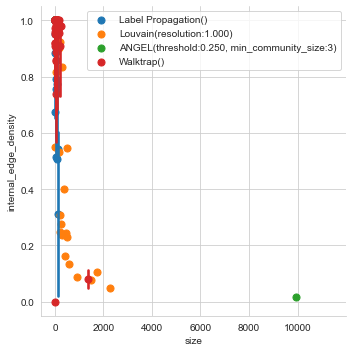

In [111]:
viz.plot_com_properties_relation([lp_coms, louv_coms, DA_coms, wt_coms], evaluation.size, evaluation.internal_edge_density)

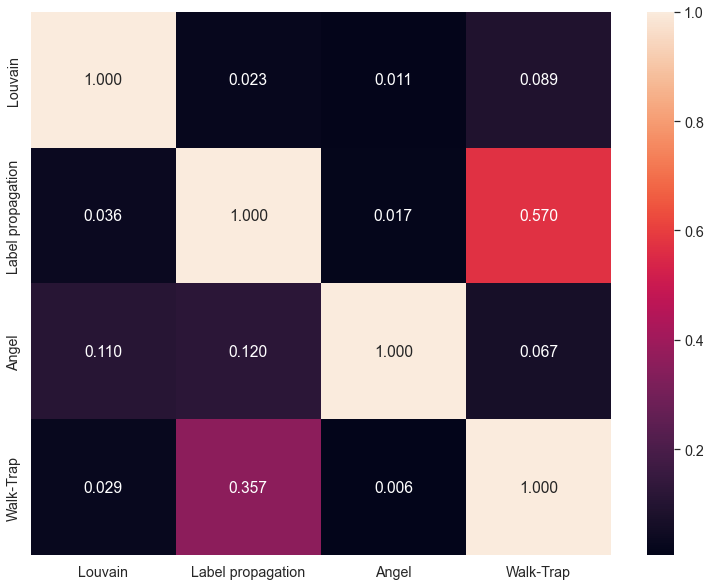

In [365]:
# Printing heatmap matrix with labels

cdNF1 = {}
cdNF1['Louvain'] = louv_coms
cdNF1['Label propagation'] = lp_coms
cdNF1['Angel'] = DA_coms
cdNF1['Walk-Trap'] = wt_coms

rows = []
for key1, value1 in cdNF1.items():
    row = []
    row.append(key1)
    for key2, value2 in cdNF1.items():
        if key1 == key2:
            row.append(1.0)
        else:
            row.append(ComparisonNF1(value1, value2).score)
    rows.append(row)

df = pd.DataFrame(rows, columns=[""]+list(cdNF1.keys()))
df.set_index('', inplace=True)


fig, ax = plt.subplots(figsize=(13,10))

sns.set(font_scale=1.3)
ax = sns.heatmap(df, annot=True, fmt='.3f')
fig.savefig("plots/heatmap-f1-comparison.png")



In [542]:
df

,Louvain,Label propagation,Angel,Walk-Trap
,,,,
Louvain,1.000000,0.022742,0.011111,0.089148
Label propagation,0.036146,1.000000,0.016503,0.569563
Angel,0.109714,0.119630,1.000000,0.067213
Walk-Trap,0.028550,0.356517,0.006003,1.000000


In [366]:
#using normalized f1 score:

def ComparisonONMI (coms1, coms2):
    ONMI= evaluation.overlapping_normalized_mutual_information_LFK(coms1, coms2)
    return ONMI

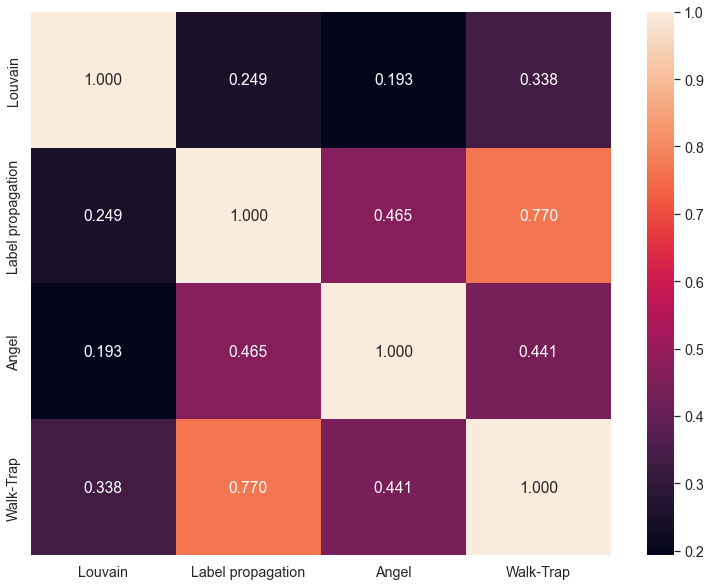

In [367]:
# Printing heatmap matrix with labels

cdONMI = {}
cdONMI['Louvain'] = louv_coms
cdONMI['Label propagation'] = lp_coms
cdONMI['Angel'] = DA_coms
cdONMI['Walk-Trap'] = wt_coms

rows = []
for key1, value1 in cdONMI.items():
    row = []
    row.append(key1)
    for key2, value2 in cdONMI.items():
        if key1 == key2:
            row.append(1.0)
        else:
            row.append(ComparisonONMI(value1, value2).score)
    rows.append(row)

df1 = pd.DataFrame(rows, columns=[""]+list(cdONMI.keys()))
df1.set_index('', inplace=True)


fig1, ax1 = plt.subplots(figsize=(13,10))

sns.set(font_scale=1.3)
ax1 = sns.heatmap(df1, annot=True, fmt='.3f')


In [368]:
fig1.savefig("plots/heatmap-ONMI-comparison.png")